In [6]:
## importing required libries
import pandas as pd
from scipy.stats import ttest_ind, f_oneway
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
## loading the dataset
df =pd.read_csv('vgsales.csv')

In [203]:
## Viewing the data
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


## Data Understanding

In [202]:
## Shape of the dataset
print(df.shape)

(16598, 11)


In [201]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [204]:
print(df.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [205]:
print(df.Year.value_counts())

Year
2007.0    1473
2009.0    1431
2008.0    1428
2010.0    1259
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64


In [46]:
print(df.Platform.value_counts())

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

# Information of Columns

#### Rank - Depicts the video game which is having the high overall sales 

#### Name - Names of the Video Games

#### Platform  - In which the Video Game is supported 

#### Year - Year in which the video game is released

#### Genre - The most widely used game classifying system categorizes games into eight genres: action, adventure, fighting, puzzle, role-playing, simulation, sports, and strategy.

#### Publisher - The company which released the game

#### NA_Sales - Sales of  Video Game ever recorded in North America

#### EU_Sales - Sales of  Video Game ever recorded in Europe

#### JP_Sales - Sales of  Video Game ever recorded in Japan

#### Other_Sales - Sales of  Video Game ever recorded in Every other country except NA, EU and JP

#### Global_Sales - Sales of all Video Games ever recorded all Countries world wide


## Some Important Information about Gaming Platfoms

#### WS -- The WonderSwan is a handheld game console released in Japan by Bandai. It was developed by Gunpei Yokoi's company Koto Laboratory and Bandai.

#### 3DO -- The 3DO Interactive Multiplayer, also referred to as simply 3DO, is a home video game console developed by The 3DO Company.

#### DC -- Sega's Dreamcast is the first console of the generation and had several features to show an advantage from the competition, including Internet gaming as an optional feature through its built-in modem, and a web browser.

#### SAT -- The Sega Saturn is a home video game console developed by Sega and released on November 22, 1994.

#### SCD -- The Sega CD plays CD-based games and adds hardware functionality such as a faster central processing unit and graphic enhancements like sprite scaling.

#### 2600 -- The Atari 2600 is a home video game console developed and produced by Atari, Inc. Released in September 1977.

#### PS -- PlayStation Network's services are dedicated to an online marketplace (PlayStation Store), a premium subscription service for enhanced gaming and social features (PlayStation Plus), music streaming (PlayStation Music, based on Spotify),TV streaming (PlayStation Vue), and formerly a cloud gaming service

#### PSP -- The PlayStation Portable (PSP) is a handheld game console developed and marketed by Sony Interactive Entertainment.

#### PCFX -- The PC-FX is a 32-bit home video game console developed by NEC and Hudson Soft. It was released in 1994 and discontinued in February 1998

#### PS2 -- The PlayStation 2 (PS2) is a home video game console developed and marketed by Sony Interactive Entertainment.

#### PSV -- The PlayStation Vita (PS Vita, or Vita) is a handheld game console developed and marketed by Sony Interactive Entertainment.

#### PS3 -- The PlayStation 3 (PS3) is a home video game console developed and marketed by Sony Interactive Entertainment. The successor to the PlayStation 2, it is part of the PlayStation brand of consoles.

#### TG16 -- The TurboGrafx-16, known as the PC Engine outside North America, is a home video game console designed by Hudson Soft and sold by NEC Home Electronics.

#### PS4 -- The PlayStation 4 (PS4) is a home video game console developed by Sony Interactive Entertainment. Announced as the successor to the PlayStation 3, it is part of the PlayStation brand of consoles.

#### PC -- A personal computer game, also known as computer game or abbreviated PC game, is a electronic game ·

#### N64 -- The Nintendo 64 (N64) is a home video game console developed by Nintendo.

#### GB -- The Game Boy is an 8-bit fourth generation handheld game console developed and manufactured by Nintendo.

#### Wii -- The Wii is a home video game console developed and marketed by Nintendo.

#### WiiU -- Wii is a series of simulation games published by Nintendo for the game console of the same name, as well as its successor, the Wii U.

#### DS -- The Nintendo DS is a handheld game console manufactured by Nintendo and released worldwide from 2004 to 2005. DS is an acronym for "developer system" or "dual screen" and introduced new features characteristic of handheld games.

#### 3DS -- The Nintendo 3DS is a handheld game console produced by Nintendo. The console was announced in March 2010 and unveiled at E3 2010 as the successor to the Nintendo DS.

#### NES -- The NES features a number of groundbreaking games, such as the 1985 platform game Super Mario Bros. and the 1986 action-adventure games The Legend of Zelda.

#### SNES -- The Super Nintendo Entertainment System, commonly shortened to Super Nintendo, Super NES or SNES is a 16-bit home video game console developed by Nintendo.

#### GC -- The Nintendo GameCube is a home video game console developed and released by Nintendo.

#### GBA -- The Game Boy Advance (GBA) is a 32-bit handheld game console developed, manufactured and marketed by Nintendo as the successor to the Game Boy Color.

#### XB -- The Xbox is a home video game console manufactured by Microsoft that is the first installment in the Xbox series of video game consoles.

#### XONE -- The Xbox One is a home video game console developed by Microsoft. Announced in May 2013.

#### X360 -- The Xbox 360 is a home video game console developed by Microsoft. As the successor to the original Xbox, it is the second console in the Xbox series.

#### GG -- Guilty Gear, subtitled The Missing Link in Japan, is a 2D fighting video game developed by Team Neo Blood.

## Data Cleaning

In [12]:
## Finding the Null Values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [13]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_table = pd.DataFrame({'column_name': df.columns,
                              'percent_missing': percent_missing})

print(missing_table)

               column_name  percent_missing
Rank                  Rank         0.000000
Name                  Name         0.000000
Platform          Platform         0.000000
Year                  Year         1.632727
Genre                Genre         0.000000
Publisher        Publisher         0.349440
NA_Sales          NA_Sales         0.000000
EU_Sales          EU_Sales         0.000000
JP_Sales          JP_Sales         0.000000
Other_Sales    Other_Sales         0.000000
Global_Sales  Global_Sales         0.000000


In [14]:
##Display of Null valued rows
null_mask = df.isnull()

null_rows = df[null_mask.any(axis=1)]

ds = pd.DataFrame(null_rows)

print(ds.head(10))

Rank                                         Name Platform  Year  \
179   180                              Madden NFL 2004      PS2   NaN   
377   378                             FIFA Soccer 2004      PS2   NaN   
431   432                   LEGO Batman: The Videogame      Wii   NaN   
470   471                   wwe Smackdown vs. Raw 2006      PS2   NaN   
607   608                               Space Invaders     2600   NaN   
624   625                                    Rock Band     X360   NaN   
649   650     Frogger's Adventures: Temple of the Frog      GBA   NaN   
652   653  LEGO Indiana Jones: The Original Adventures      Wii   NaN   
711   713                               Call of Duty 3      Wii   NaN   
782   784                                    Rock Band      Wii   NaN   

         Genre                               Publisher  NA_Sales  EU_Sales  \
179     Sports                         Electronic Arts      4.26      0.26   
377     Sports                         Electronic Arts      0.59      2.36   
431     Action  Warner Bros. Interactive Entertainment      1.86      1.02   
470   Fighting                                     NaN      1.57      1.02   
607    Shooter                                   Atari      2.36      0.14   
624       Misc                         Electronic Arts      1.93      0.34   
649  Adventure            Konami Digital Entertainment      2.15      0.18   
652     Action                               LucasArts      1.54      0.63   
711    Shooter                              Activision      1.19      0.84   
782       Misc                               MTV Games      1.35      0.56   

     JP_Sales  Other_Sales  Global_Sales  
179      0.01         0.71          5.23  
377      0.04         0.51          3.49  
431      0.00         0.29          3.17  
470      0.00         0.41          3.00  
607      0.00         0.03          2.53  
624      0.00         0.21          2.48  
649      0.00         0.07          2.39  
652      0.00         0.22          2.39  
711      0.00         0.23          2.26  
782      0.00         0.20          2.11

In [15]:
## Replacing the null values in Year using median
median_value = df['Year'].median()

df['Year'].fillna(median_value, inplace=True)

median_value

2007.0

In [16]:
## Replacing the null values in Publisher using mode
mode_value = df['Publisher'].mode()[0]

df['Publisher'].fillna(mode_value, inplace=True)

print(mode_value)

Electronic Arts


In [17]:
## Finding the Null Values
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [174]:
# Check for duplicates in the "Name" column
name_duplicates = df['Rank'].duplicated()

# Print the result
print(f"Are there any duplicates in the 'Rank' column? {any(name_duplicates)}")

Are there any duplicates in the 'Rank' column? False


In [42]:
# Check for duplicates in the "Name" column
name_duplicates = df['Name'].duplicated()

# Print the result
print(f"Are there any duplicates in the 'Name' column? {any(name_duplicates)}")

Are there any duplicates in the 'Name' column? True


In [172]:
# Identify rows with duplicate names
duplicate_rows = df[name_duplicates]

# Print the duplicate rows
duplicate_rows.head()

Rank                            Name Platform    Year    Genre  \
23    24              Grand Theft Auto V     X360  2013.0   Action   
35    36      Call of Duty: Black Ops II     X360  2012.0  Shooter   
37    38  Call of Duty: Modern Warfare 3      PS3  2011.0  Shooter   
40    41         Call of Duty: Black Ops      PS3  2010.0  Shooter   
44    45              Grand Theft Auto V      PS4  2014.0   Action   

               Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
23  Take-Two Interactive      9.63      5.31      0.06         1.38   
35            Activision      8.25      4.30      0.07         1.12   
37            Activision      5.54      5.82      0.49         1.62   
40            Activision      5.98      4.44      0.48         1.83   
44  Take-Two Interactive      3.80      5.81      0.36         2.02   

    Global_Sales  
23         16.38  
35         13.73  
37         13.46  
40         12.73  
44         11.98

In [171]:
# Filter the DataFrame to find rows containing "Grand Theft Auto V" in the "Name" column
gta_rows = df[df['Name'].str.contains('Grand Theft Auto V')]

# Print the filtered DataFrame
gta_rows.head()


Rank                                               Name Platform    Year  \
16     17                                 Grand Theft Auto V      PS3  2013.0   
23     24                                 Grand Theft Auto V     X360  2013.0   
44     45                                 Grand Theft Auto V      PS4  2014.0   
197   198                                 Grand Theft Auto V     XOne  2014.0   
617   618  Rockstar Games Double Pack: Grand Theft Auto I...       XB  2003.0   

      Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
16   Action  Take-Two Interactive      7.01      9.27      0.97         4.14   
23   Action  Take-Two Interactive      9.63      5.31      0.06         1.38   
44   Action  Take-Two Interactive      3.80      5.81      0.36         2.02   
197  Action  Take-Two Interactive      2.66      2.01      0.00         0.41   
617  Action  Take-Two Interactive      1.84      0.56      0.00         0.09   

     Global_Sales  
16          21.40  
23          16.38  
44          11.98  
197          5.08  
617          2.49

## Data Understanding

In [114]:
df.Genre.value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [115]:
genre_counts = df['Genre'].value_counts()
genre_percentages = (genre_counts / len(df)) * 100
genre_percentages

Genre
Action          19.978311
Sports          14.134233
Misc            10.477166
Role-Playing     8.964936
Shooter          7.892517
Adventure        7.747921
Racing           7.525003
Platform         5.337993
Simulation       5.223521
Fighting         5.109049
Strategy         4.102904
Puzzle           3.506447
Name: count, dtype: float64

In [173]:
df.Rank.value_counts()

Rank
1        1
11089    1
11059    1
11060    1
11061    1
        ..
5539     1
5540     1
5541     1
5542     1
16600    1
Name: count, Length: 16598, dtype: int64

In [175]:
df.Year.value_counts()

Year
2007.0    1473
2009.0    1431
2008.0    1428
2010.0    1259
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

In [176]:
df.Publisher.value_counts()

Publisher
Electronic Arts                 1409
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [177]:
df.Platform.value_counts()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

## UNIVARIAT ANALYSIS

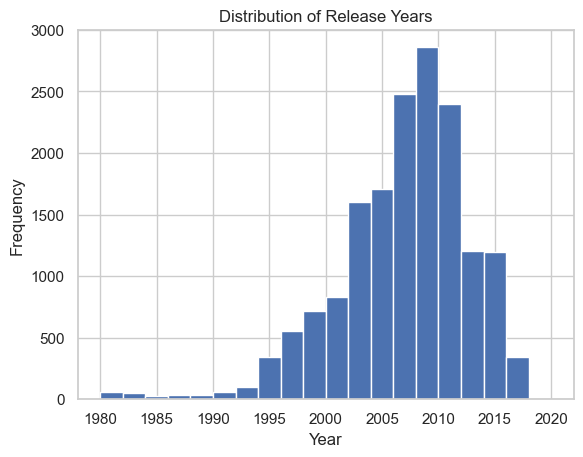

In [111]:
# Create histogram
plt.hist(df['Year'], bins=20)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Years')
plt.show()

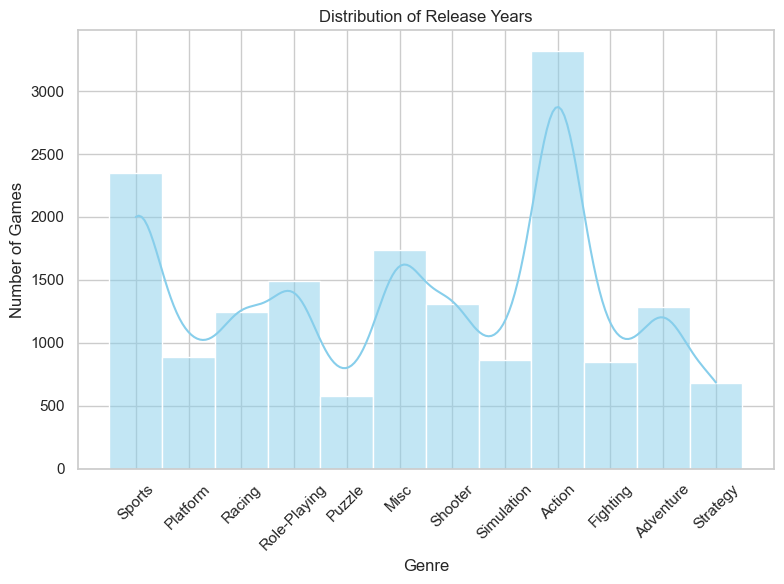

In [112]:
# Create histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(df['Genre'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Release Years')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

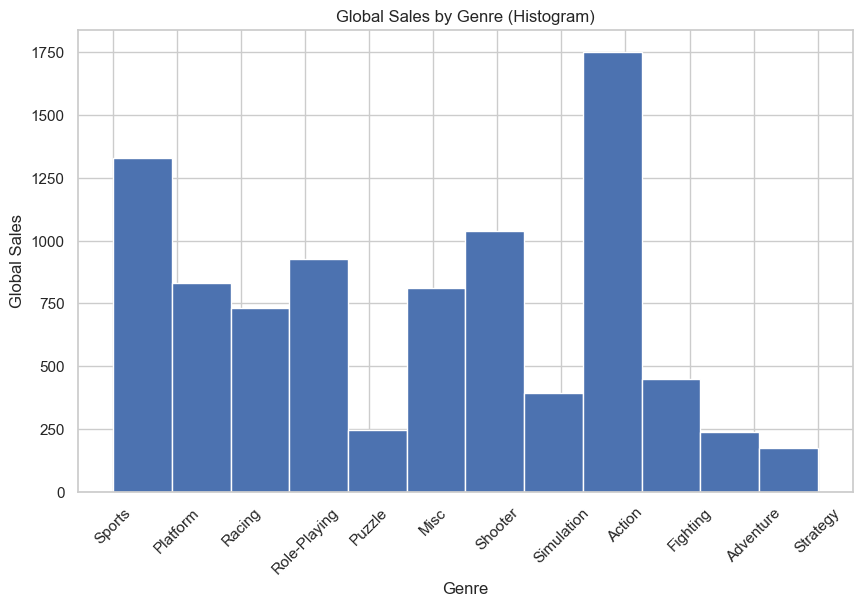

In [116]:
# Histogram for Global Sales by Genre
plt.figure(figsize=(10, 6))
plt.hist(df["Genre"], weights=df["Global_Sales"], bins=len(df["Genre"].unique()))
plt.xlabel("Genre")
plt.ylabel("Global Sales")
plt.title("Global Sales by Genre (Histogram)")
plt.xticks(rotation=45)
plt.show()

## Bivariate Analysis

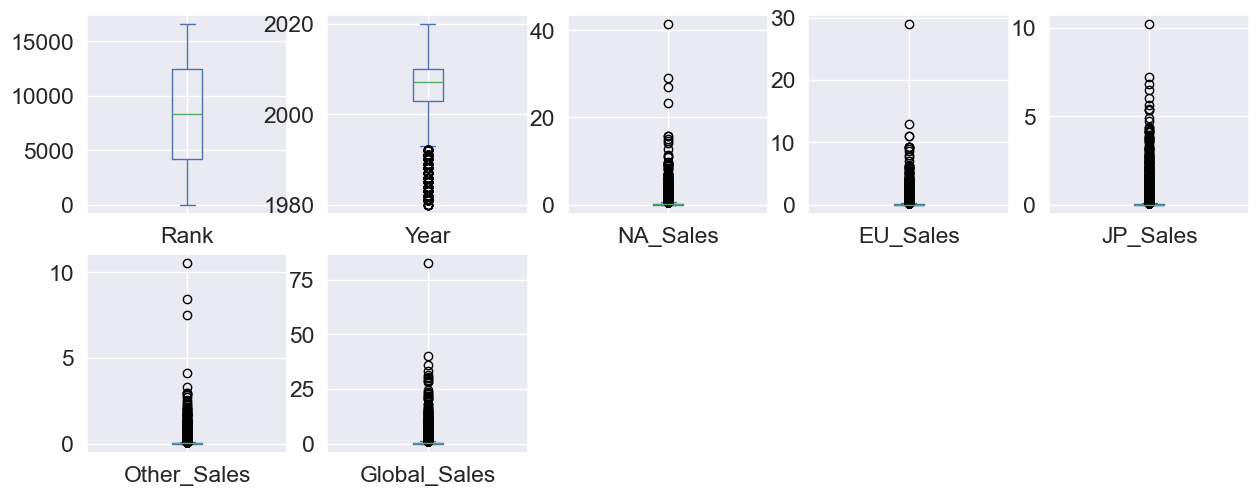

In [140]:
df.plot(kind='box', subplots=True, figsize=(15,15), layout=(5,5))
plt.show()

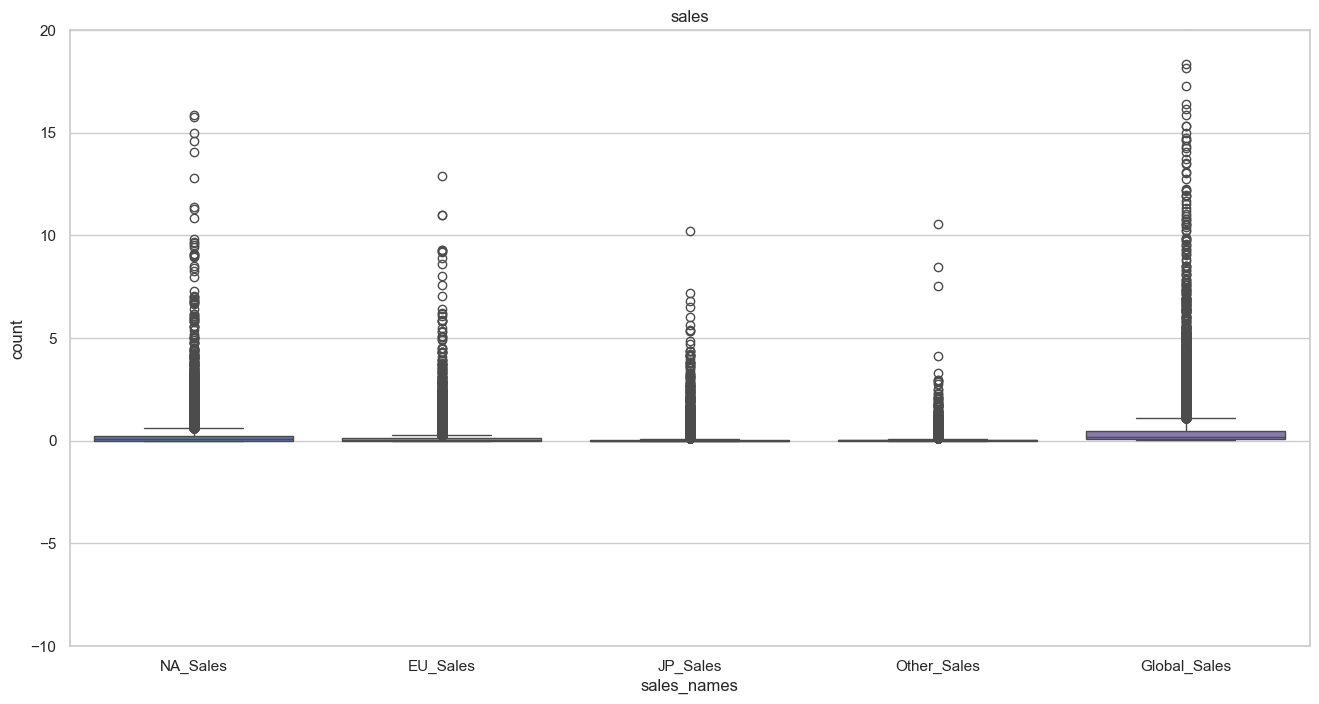

In [141]:
x=df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]

# Set the style of the plot
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(16, 8))
sns.boxplot(data=x)
plt.title('sales')
plt.xlabel('sales_names')
plt.ylabel('count')

# Set the y-axis limits to expand the range
plt.ylim(-10, 20)  # Adjust the values as needed

plt.show()

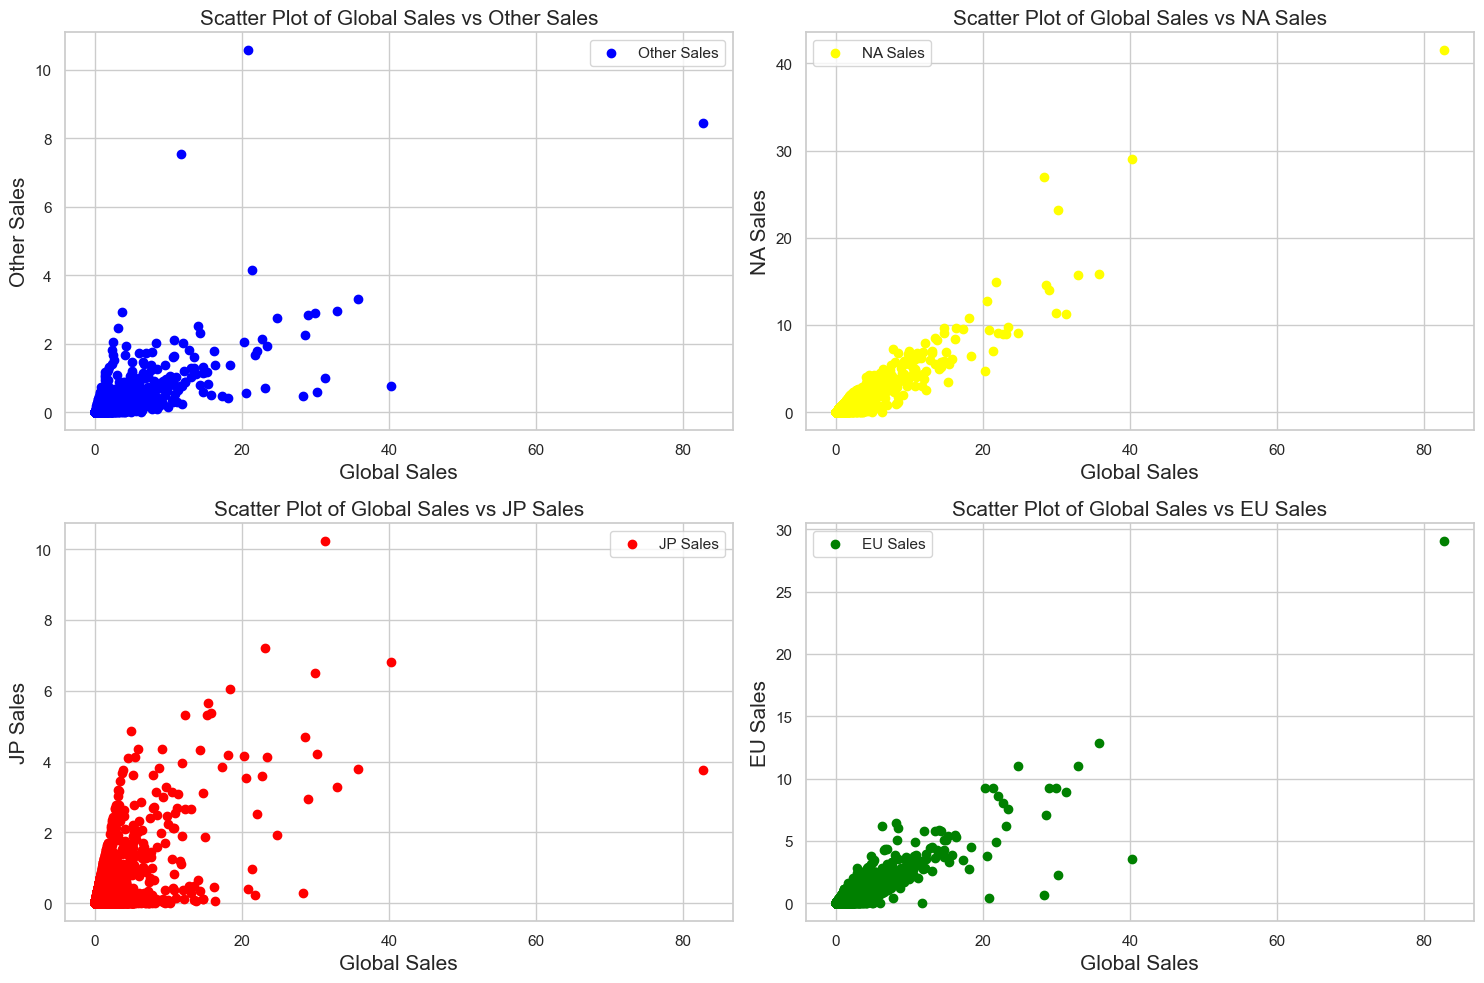

In [142]:
plt.figure(figsize=(15, 10))

# Scatter plot 1
plt.subplot(2, 2, 1)
plt.scatter(df['Global_Sales'], df['Other_Sales'], color='blue', label='Other Sales')
plt.xlabel('Global Sales', fontsize=15)
plt.ylabel('Other Sales', fontsize=15)
plt.title('Scatter Plot of Global Sales vs Other Sales', fontsize=15)
plt.legend()
plt.grid(True)

# Scatter plot 2
plt.subplot(2, 2, 2)
plt.scatter(df['Global_Sales'], df['NA_Sales'], color='yellow', label='NA Sales')
plt.xlabel('Global Sales', fontsize=15)
plt.ylabel('NA Sales', fontsize=15)
plt.title('Scatter Plot of Global Sales vs NA Sales', fontsize=15)
plt.legend()
plt.grid(True)

# Scatter plot 3
plt.subplot(2, 2, 3)
plt.scatter(df['Global_Sales'], df['JP_Sales'], color='red', label='JP Sales')
plt.xlabel('Global Sales', fontsize=15)
plt.ylabel('JP Sales', fontsize=15)
plt.title('Scatter Plot of Global Sales vs JP Sales', fontsize=15)
plt.legend()
plt.grid(True)

# Scatter plot 4
plt.subplot(2, 2, 4)
plt.scatter(df['Global_Sales'], df['EU_Sales'], color='green', label='EU Sales')
plt.xlabel('Global Sales', fontsize=15)
plt.ylabel('EU Sales', fontsize=15)
plt.title('Scatter Plot of Global Sales vs EU Sales', fontsize=15)
plt.legend()
plt.grid(True)

## Adjust the padding between and around subplots to avoid overlapping labels
plt.tight_layout()

## Display the graph
plt.show()

In [143]:
correlation = df['Global_Sales'].corr(df['NA_Sales'])
print('Correlation coefficient between Global and North America Sales:', correlation)

Correlation coefficient between Global and North America Sales: 0.9410473571255523


In [144]:
correlation = df['Global_Sales'].corr(df['EU_Sales'])
print('Correlation coefficient between Global and Europe Sales:', correlation)

Correlation coefficient between Global and Europe Sales: 0.9028358134817434


In [145]:
correlation = df['Global_Sales'].corr(df['JP_Sales'])
print('Correlation coefficient between Global and Japan Sales:', correlation)

Correlation coefficient between Global and Japan Sales: 0.6118155181564976


In [146]:
correlation = df['Global_Sales'].corr(df['Other_Sales'])
print('Correlation coefficient between Global and Other Countries Sales:', correlation)

Correlation coefficient between Global and Other Countries Sales: 0.748330846407796


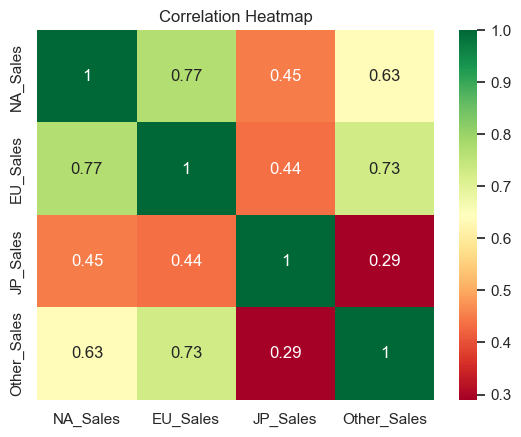

In [147]:
sns.heatmap(df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].corr(),annot =True,cmap="RdYlGn")
plt.title("Correlation Heatmap")
plt.show()

In [148]:
data_pair = df.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

Year Platform         Genre  NA_Sales  EU_Sales  Other_Sales
0      2006.0      Wii        Sports     41.49     29.02         8.46
1      1985.0      NES      Platform     29.08      3.58         0.77
2      2008.0      Wii        Racing     15.85     12.88         3.31
3      2009.0      Wii        Sports     15.75     11.01         2.96
4      1996.0       GB  Role-Playing     11.27      8.89         1.00
...       ...      ...           ...       ...       ...          ...
16593  2002.0      GBA      Platform      0.01      0.00         0.00
16594  2003.0       GC       Shooter      0.01      0.00         0.00
16595  2008.0      PS2        Racing      0.00      0.00         0.00
16596  2010.0       DS        Puzzle      0.00      0.01         0.00
16597  2003.0      GBA      Platform      0.01      0.00         0.00

[16598 rows x 6 columns]

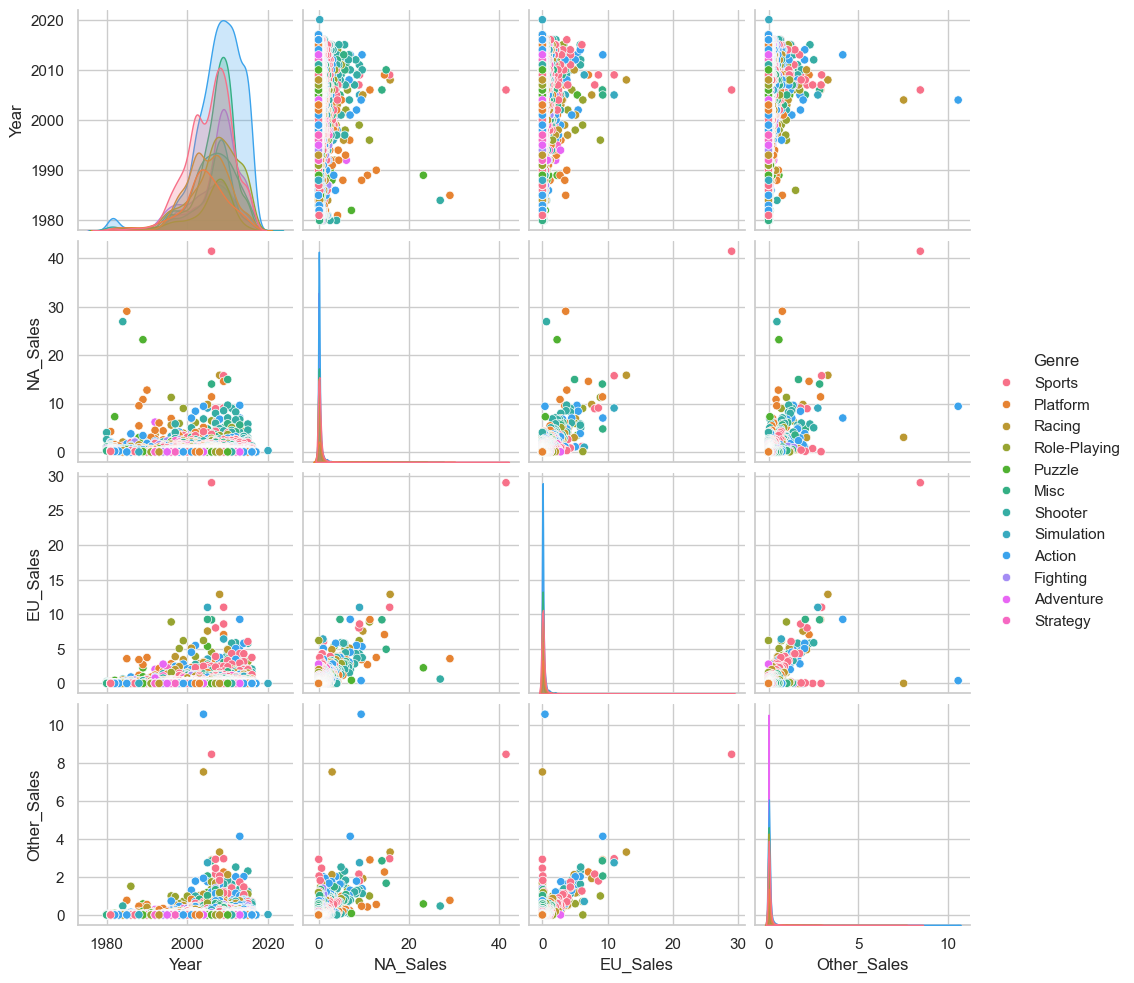

In [149]:
sns.pairplot(data_pair, hue='Genre')
plt.show()

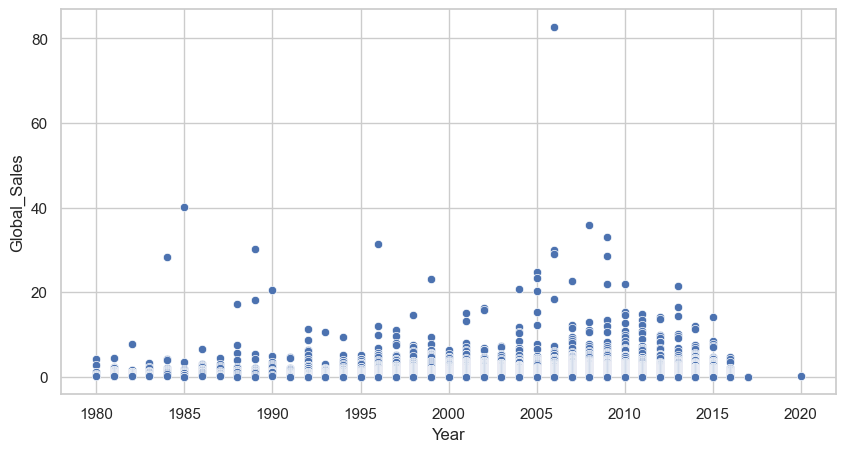

In [150]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Year", y="Global_Sales")
plt.show()

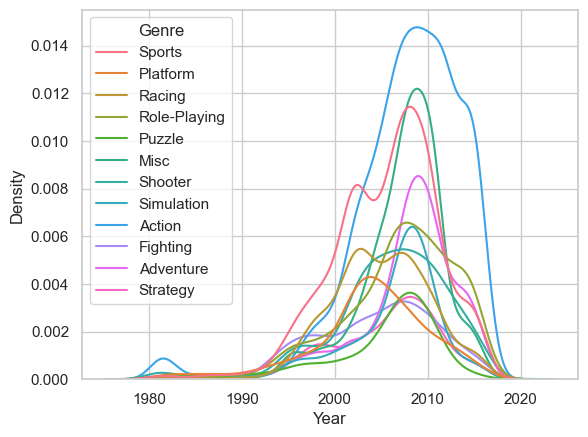

In [151]:
sns.kdeplot(x='Year',data = df,hue ='Genre')
plt.show()

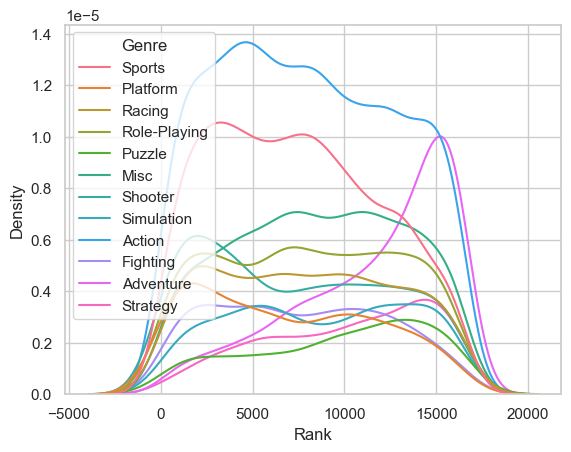

In [152]:
sns.kdeplot(x='Rank',data = df,hue ='Genre')
plt.show()

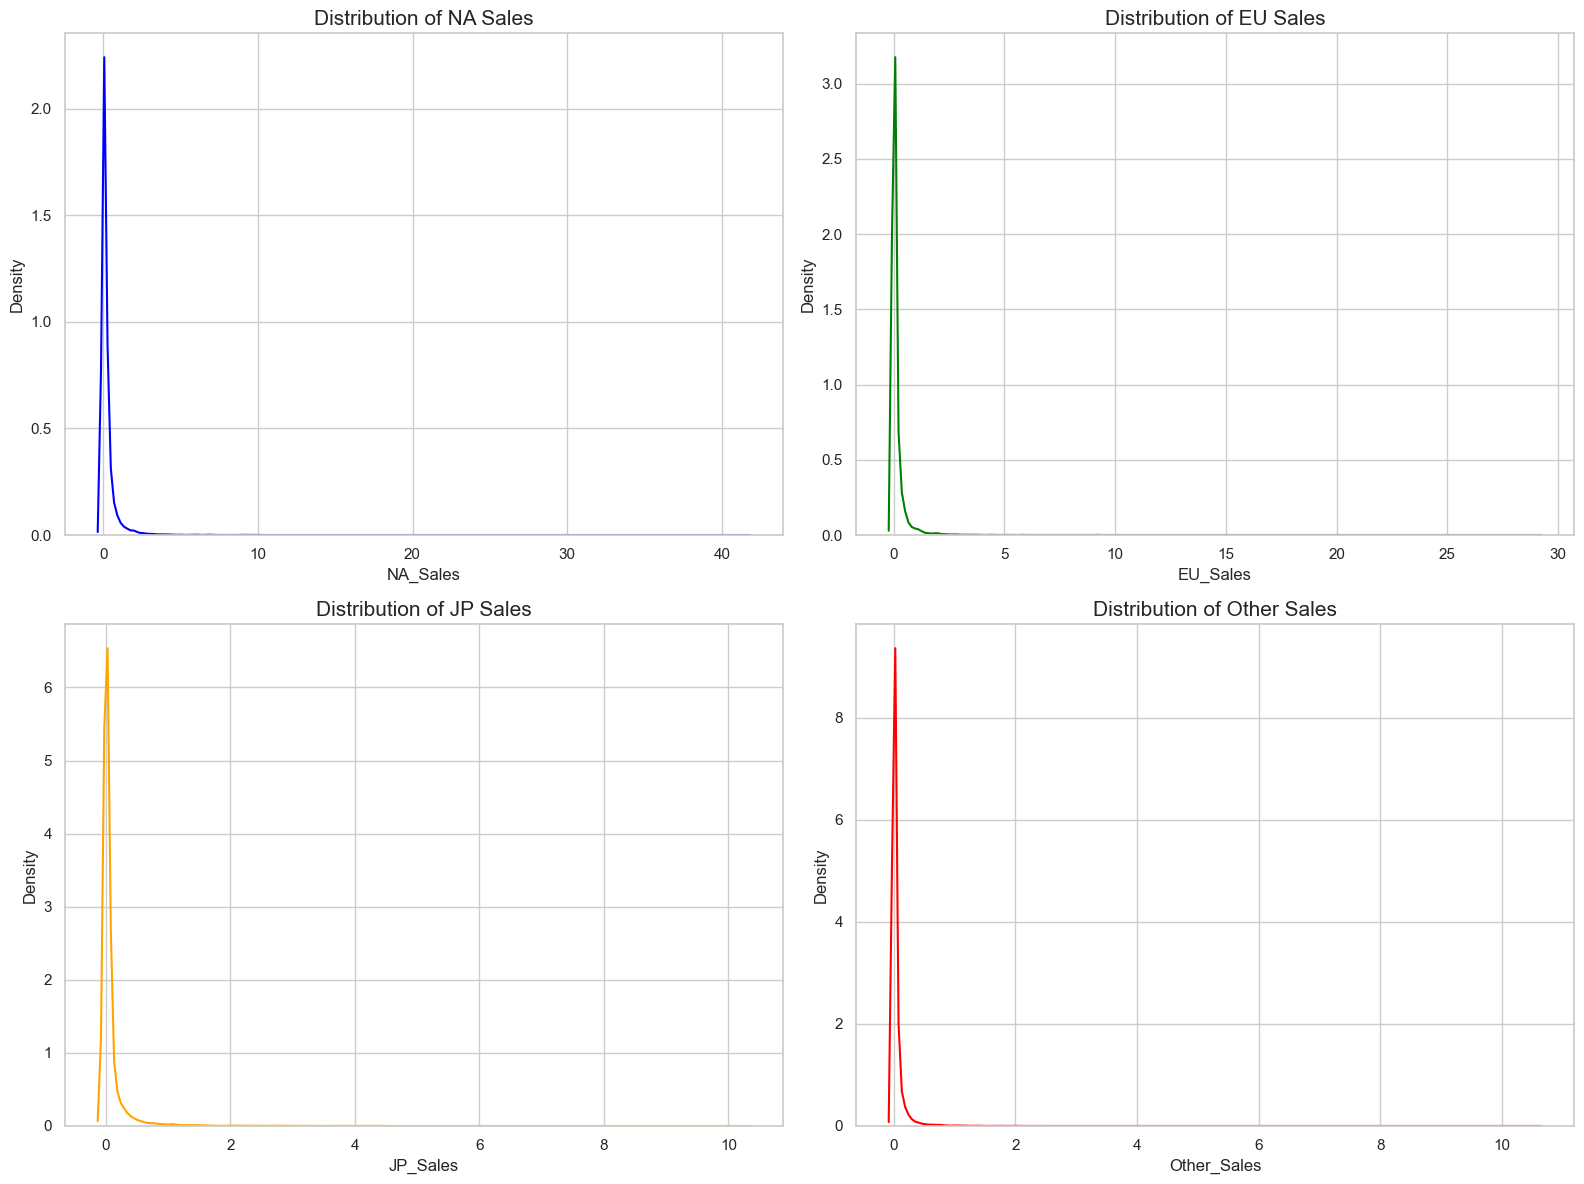

In [153]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(16, 12))

# Create a subplot for each distribution
plt.subplot(2, 2, 1)
plt.title("Distribution of NA Sales", fontsize=15)
sns.kdeplot(data=x['NA_Sales'], color='blue')

plt.subplot(2, 2, 2)
plt.title("Distribution of EU Sales", fontsize=15)
sns.kdeplot(data=x['EU_Sales'], color='green')

plt.subplot(2, 2, 3)
plt.title("Distribution of JP Sales", fontsize=15)
sns.kdeplot(data=x['JP_Sales'], color='orange')

plt.subplot(2, 2, 4)
plt.title("Distribution of Other Sales", fontsize=15)
sns.kdeplot(data=x['Other_Sales'], color='red')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

## Multivariate Analysis

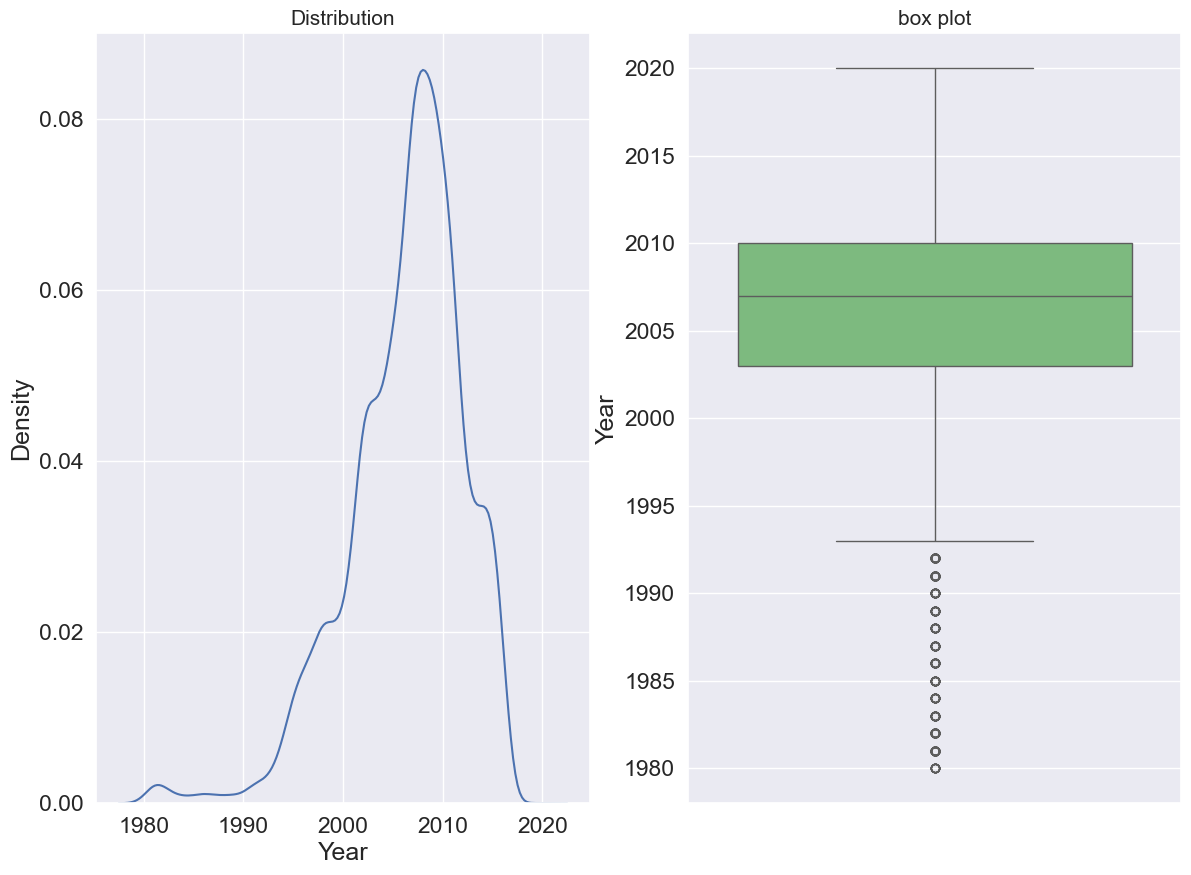

In [93]:
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
plt.title("Distribution", fontsize=15)
sns.kdeplot(data = df["Year"])
plt.subplot(1,2,2)
plt.title("box plot", fontsize=15)
sns.boxplot(data = df["Year"], palette="Greens")
plt.show()

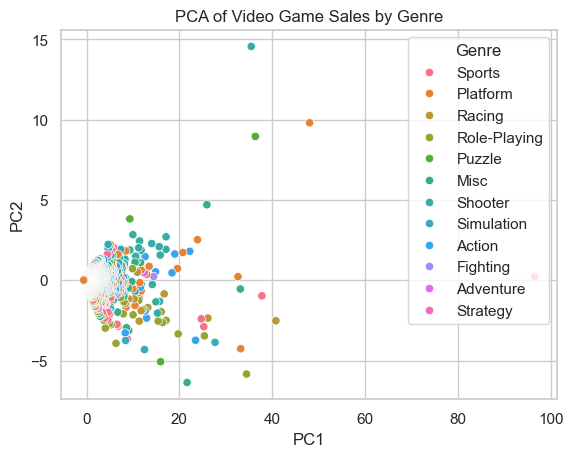

In [160]:
# Select features to use for PCA
features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
X = df[features]

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create new dataframe with principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add target variable to new dataframe
df_pca['Genre'] = df['Genre']

# Plot results
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Genre')
plt.title('PCA of Video Game Sales by Genre')
plt.show()


## Distributions

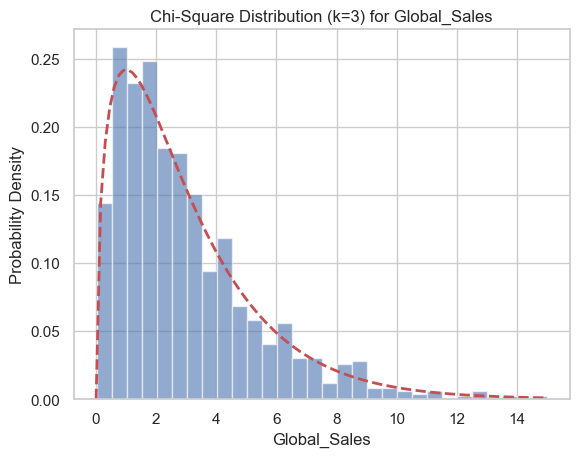

In [166]:
# Extract 'Global_Sales' data from DataFrame
global_sales = df['Global_Sales'].values

# Define the degrees of freedom (k)
k = 3  # Example: Degrees of freedom

# Generate random samples from a chi-square distribution
num_samples = 1000
samples = np.random.chisquare(df=k, size=num_samples)

# Create a histogram to visualize the distribution
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b')

# Create the theoretical probability density function
x = np.linspace(0, max(samples), 100)
pdf = (1/(2**(k/2) * np.math.gamma(k/2))) * x**((k/2) - 1) * np.exp(-x/2)
plt.plot(x, pdf, 'r--', lw=2)

# Add labels and title to the plot
plt.xlabel("Global_Sales")
plt.ylabel("Probability Density")
plt.title(f"Chi-Square Distribution (k={k}) for Global_Sales")

# Show the plot
plt.show()


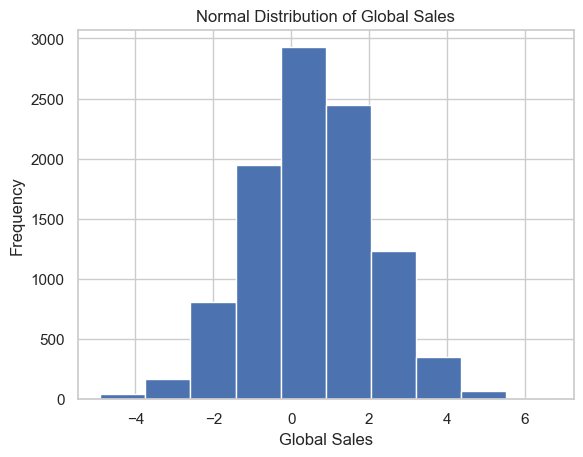

In [78]:
# Extract the global sales column
global_sales = df['Global_Sales']

# Calculate the mean and standard deviation of global sales
mean = global_sales.mean()
std = global_sales.std()

# Create a normal distribution object
norm_dist = np.random.normal(mean, std, size=10000)

# Plot the normal distribution
plt.hist(norm_dist)
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.title('Normal Distribution of Global Sales')
plt.show()

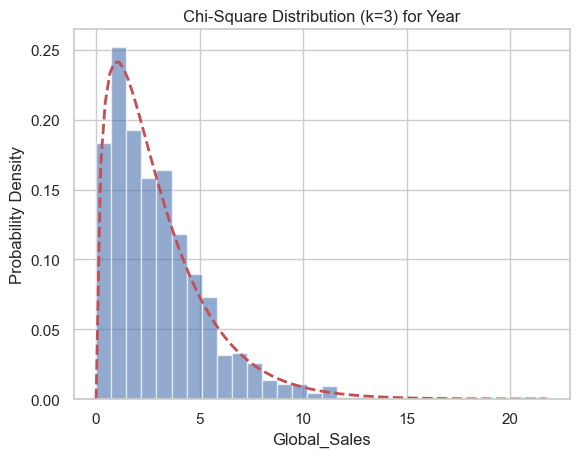

In [79]:
# Extract 'Year' data from DataFrame
global_sales = df['Year'].values

# Define the degrees of freedom (k)
k = 3  # Example: Degrees of freedom

# Generate random samples from a chi-square distribution
num_samples = 1000
samples = np.random.chisquare(df=k, size=num_samples)

# Create a histogram to visualize the distribution
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b')

# Create the theoretical probability density function
x = np.linspace(0, max(samples), 100)
pdf = (1/(2**(k/2) * np.math.gamma(k/2))) * x**((k/2) - 1) * np.exp(-x/2)
plt.plot(x, pdf, 'r--', lw=2)

# Add labels and title to the plot
plt.xlabel("Global_Sales")
plt.ylabel("Probability Density")
plt.title(f"Chi-Square Distribution (k={k}) for Year")

# Show the plot
plt.show()

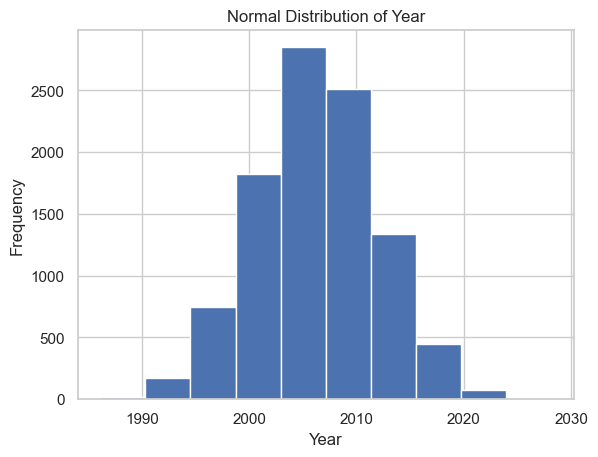

In [80]:
# Extract the 'Year' column
global_sales = df['Year']

# Calculate the mean and standard deviation of Year
mean = global_sales.mean()
std = global_sales.std()

# Create a normal distribution object
norm_dist = np.random.normal(mean, std, size=10000)

# Plot the normal distribution
plt.hist(norm_dist)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Normal Distribution of Year')
plt.show()

In [81]:
data_hist_log = df.copy()

In [82]:
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

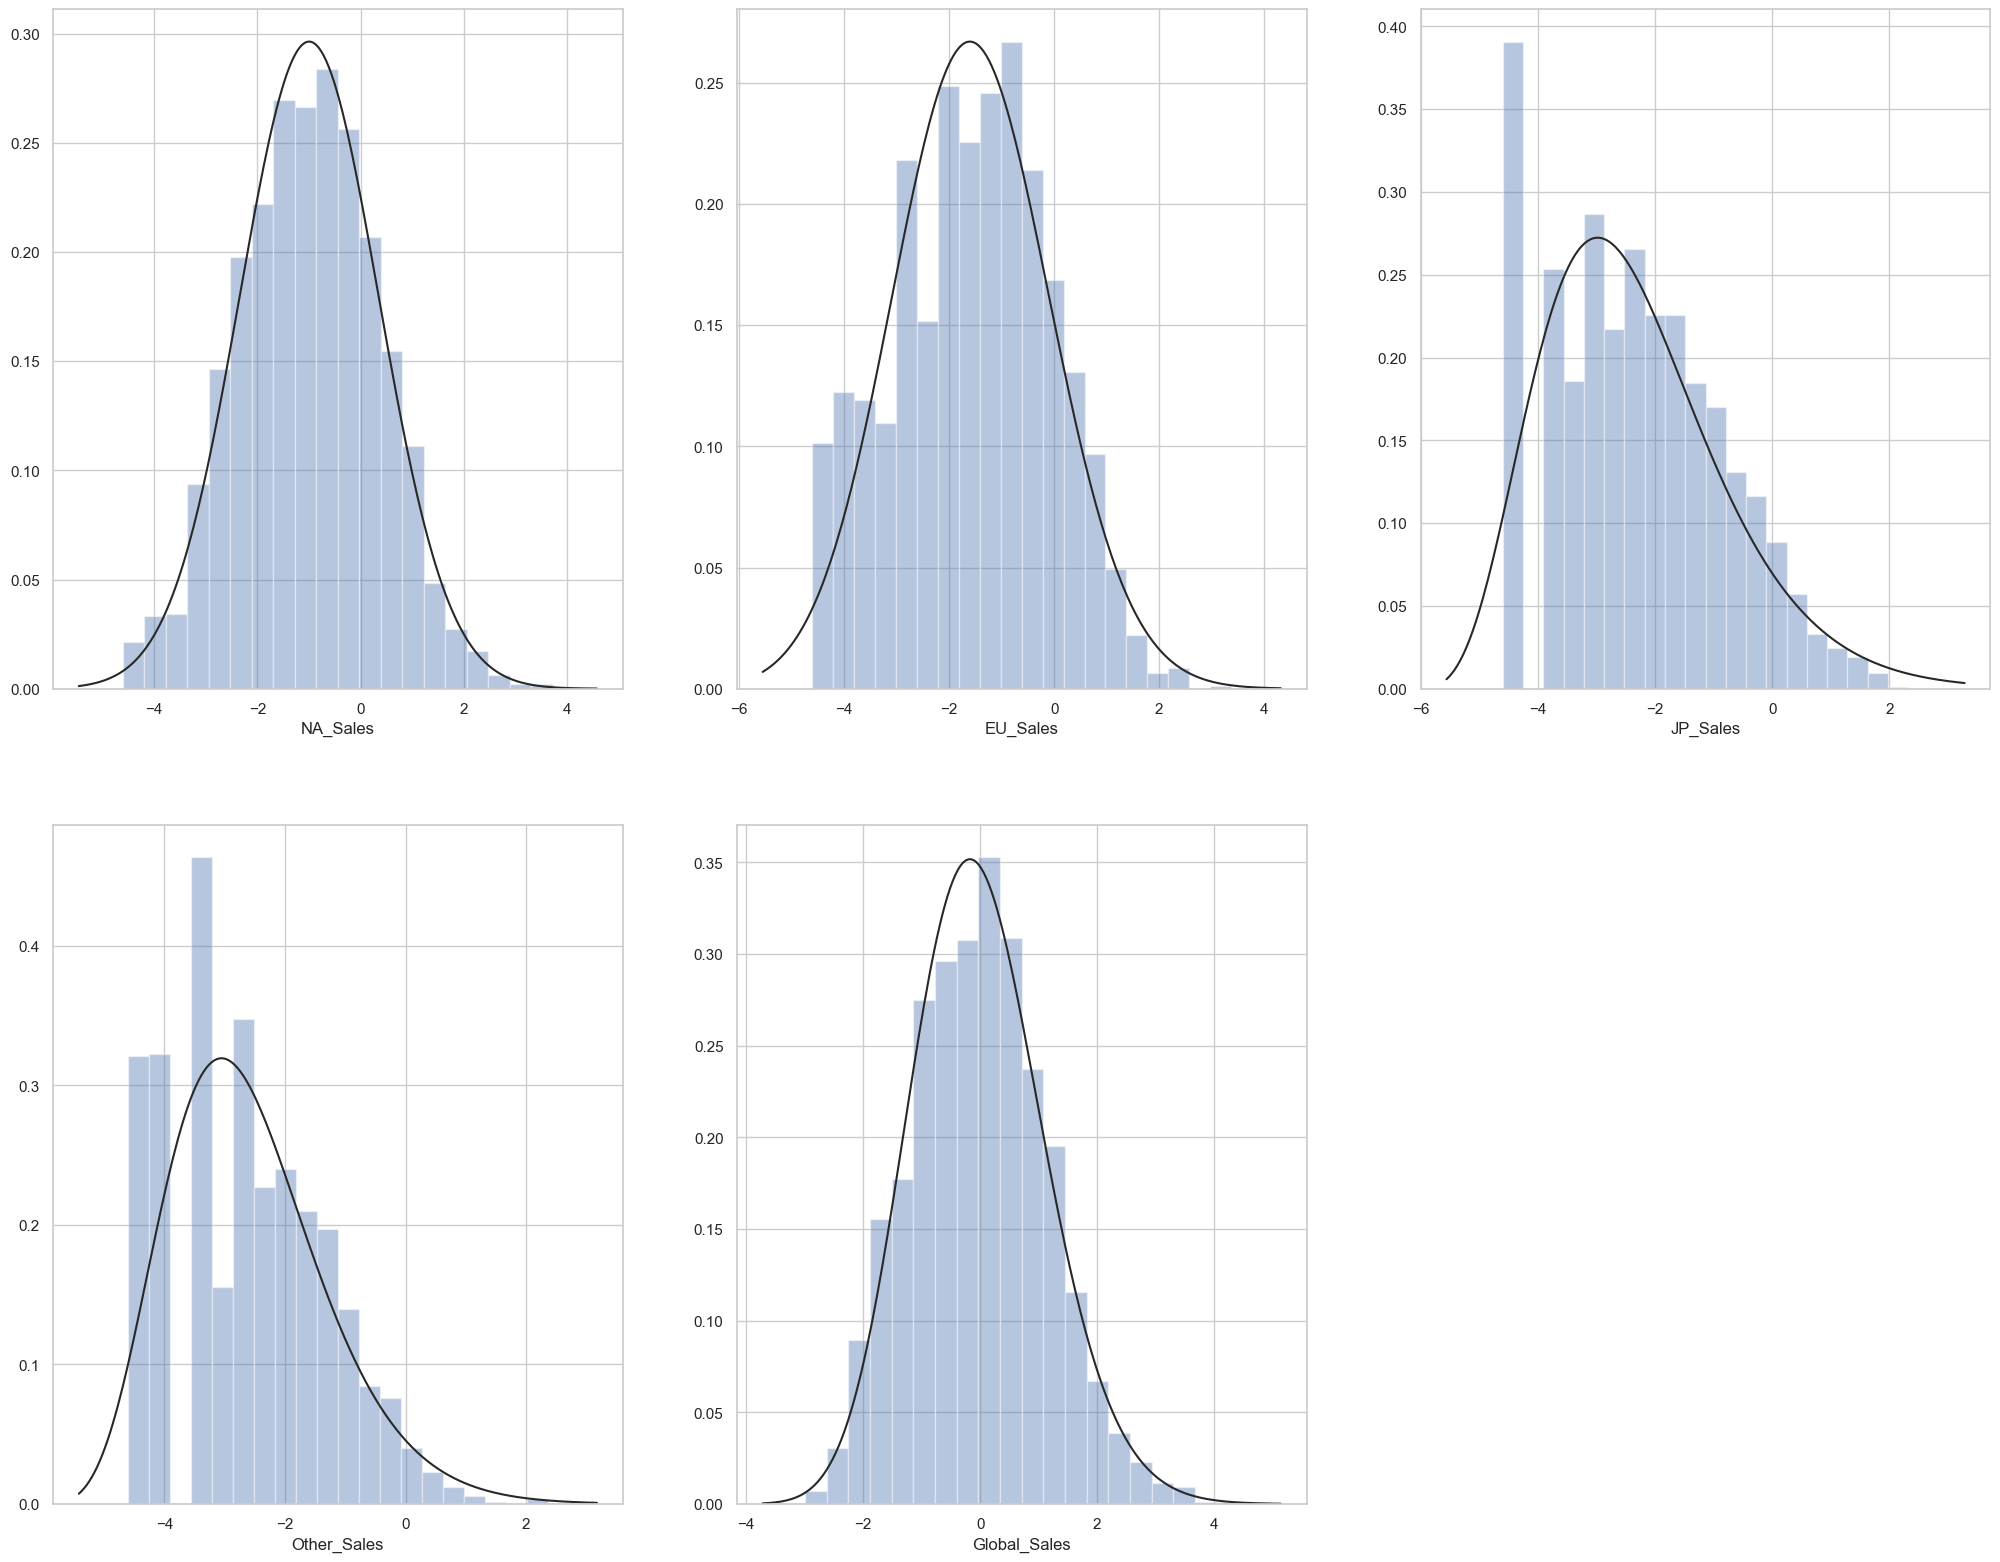

In [83]:
from scipy import stats

plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,3,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)
plt.show()

#### we can see their skewness and central tendency. we can say that our almost all data are right skewed and symmetric skewed after log transformation

## Hypothesis Testing 

#### Hypothesis 1: The average video game sales in North America is higher than the average video game sales in Europe.

H0: mu_NA <= mu_EU

Ha: mu_NA > mu_EU

#### Hypothesis 2: The variance of video game sales in Japan is higher than the variance of video game sales in North America.

H0: var_JP <= var_NA

Ha: var_JP > var_NA

### a two-sample t-test to compare the means of the two groups.

#### t = (x̄1 - x̄2) / sqrt(s_1^2 / n1 + s_2^2 / n2)
where:

x̄1 and x̄2 are the sample means
s_1^2 and s_2^2 are the sample variances
n1 and n2 are the sample sizes

### F-test to compare the variances of the two groups.

#### F = s_1^2 / s_2^2

In [84]:
na_sales = df['NA_Sales']
eu_sales = df['EU_Sales']

# Conduct a two-sample t-test to compare the means of the two groups
t_statistic, p_value = ttest_ind(na_sales, eu_sales)

# Print the results of the t-test
print('Two-sample t-test results:')
print('t-statistic:', t_statistic)
print('p-value:', p_value)

# Extract the sales columns for Japan and North America
jp_sales = df['JP_Sales']

# Conduct an F-test to compare the variances of the two groups
f_statistic, p_value = f_oneway(jp_sales, na_sales)

# Print the results of the F-test
print('F-test results:')
print('F-statistic:', f_statistic)
print('p-value:', p_value)


Two-sample t-test results:
t-statistic: 15.831371100049914
p-value: 3.0384925458015177e-56
F-test results:
F-statistic: 760.1394504077623
p-value: 1.8417918080111082e-165


Hypothesis 1: The t-statistic of 15.83 and p-value of 3.0384925458015177e-56 provide strong evidence that the mean video game sales in North America is significantly higher than the mean video game sales in Europe.

Hypothesis 2: The F-statistic of 760.14 and p-value of 1.8417918080111082e-165 provide even stronger evidence that the variance of video game sales in Japan is significantly higher than the variance of video game sales in North America.

# SECTION _ II

## Questions for Analysis

### 1.How is sales distribution across the global market?

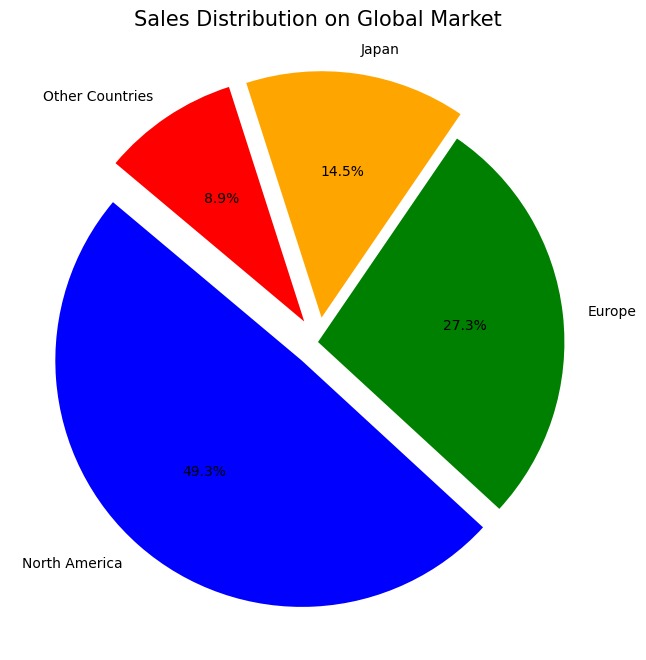

In [47]:
## Sum of all Sales
total_na_sales = df['NA_Sales'].sum()
total_eu_sales = df['EU_Sales'].sum()
total_jp_sales = df['JP_Sales'].sum()
total_other_sales = df['Other_Sales'].sum()

# Creating a list of sales values for each region
sales_values = [total_na_sales, total_eu_sales, total_jp_sales, total_other_sales]
regions = ['North America', 'Europe', 'Japan', 'Other Countries']

# Create a pie chart for the sales distribution
plt.figure(figsize=(8,8))
plt.pie(sales_values, labels=regions,explode = [0.1,0,0.1,0.1], autopct="%1.1f%%", startangle=140, colors=['blue', 'green', 'orange', 'red'])

## Title
plt.title("Sales Distribution on Global Market", fontsize=15)

## Display of plot
plt.show()

North America has the highest shares

### 2 .list the platforms that support video games?

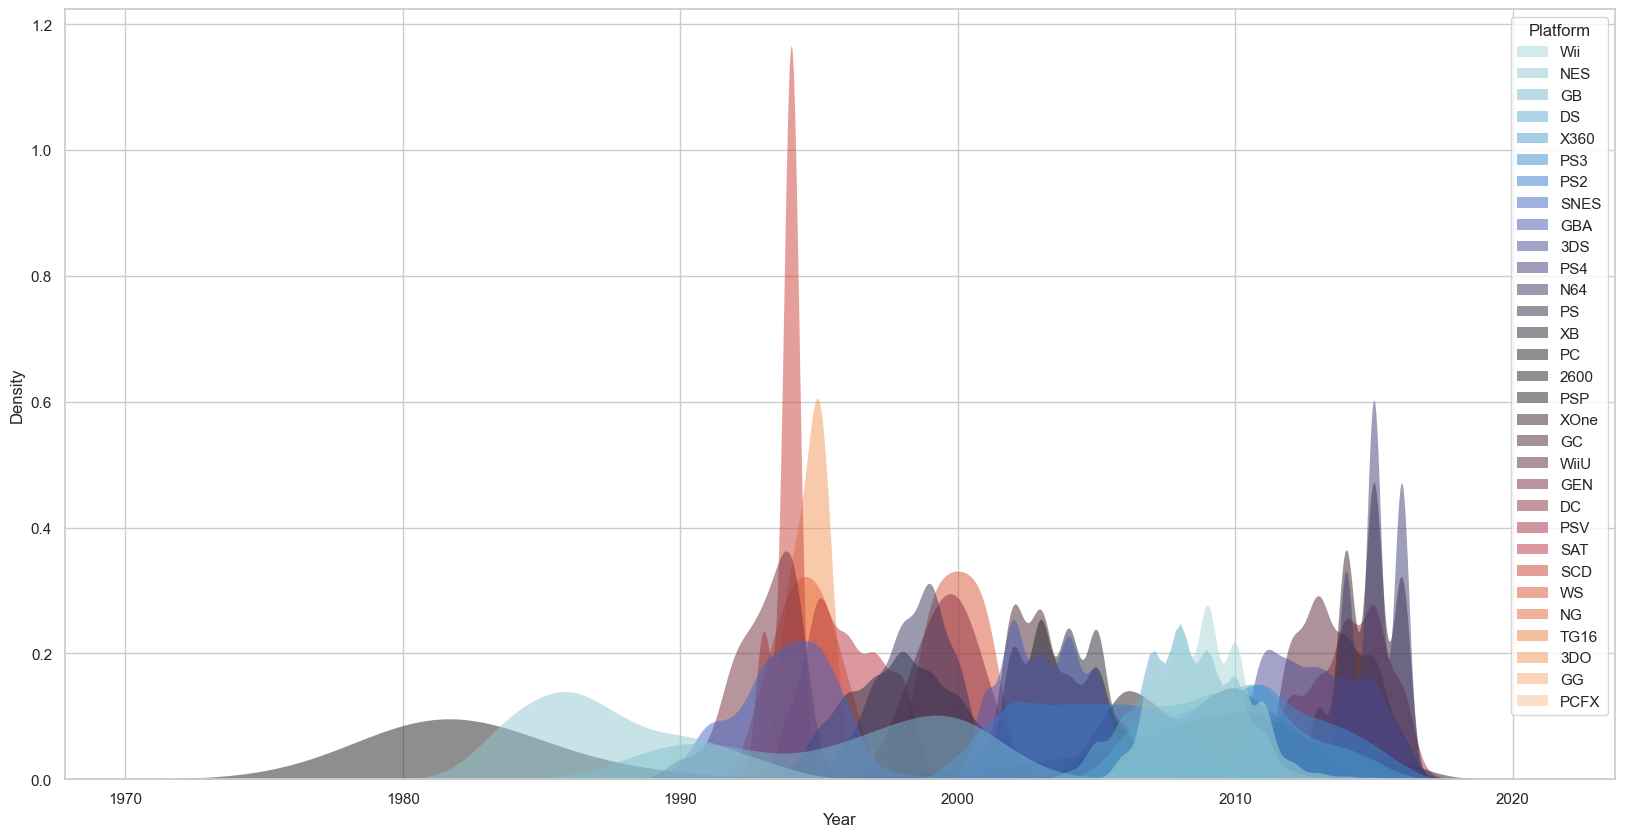

In [158]:
plt.figure(figsize=(20,10))
sns.kdeplot( data=df,  x='Year',hue="Platform", fill=True, common_norm=False, palette="icefire", alpha=.5, linewidth=0,legend=True)
plt.show()

#### in the early 1980s, 2600 were the most popular platform.
#### by mid 1980s, NES became very popular.
#### at the start of the 1990s, GB was popular
#### in mid 1990s GB declined while SNES, DC, 3DO, WS, got more popular. SAT was highly grossing of all the years at that time.
#### in late 1990s, PS, XB, and NES resurfaced
#### early 2000s, SCD and SAT along with NES were highly grossing
#### mid 2000s, PSP, WiiU, PS2, SNES resurfaced, GBA,GC were popular
#### late 2000s, GB resurfaced, Wii, PS3, X360, DS were highly used gaming platforms.
#### early 2010s, GB still there, Wii, PS3, X360, DS, in addtion to 3DS, WiiU, were highly grossing gaming platforms.
#### mid 2010s, PS4 was very popular, PSV, Wiiu still grossing and so does 3DS, PCs were very popular.
#### SAT was the highest grossing gaming platform of all time
#### NES was the longest grossing gaming platform for up to 2 and a half decades!! 25 years of NES.

### 3. Number of games that support these Platforms?

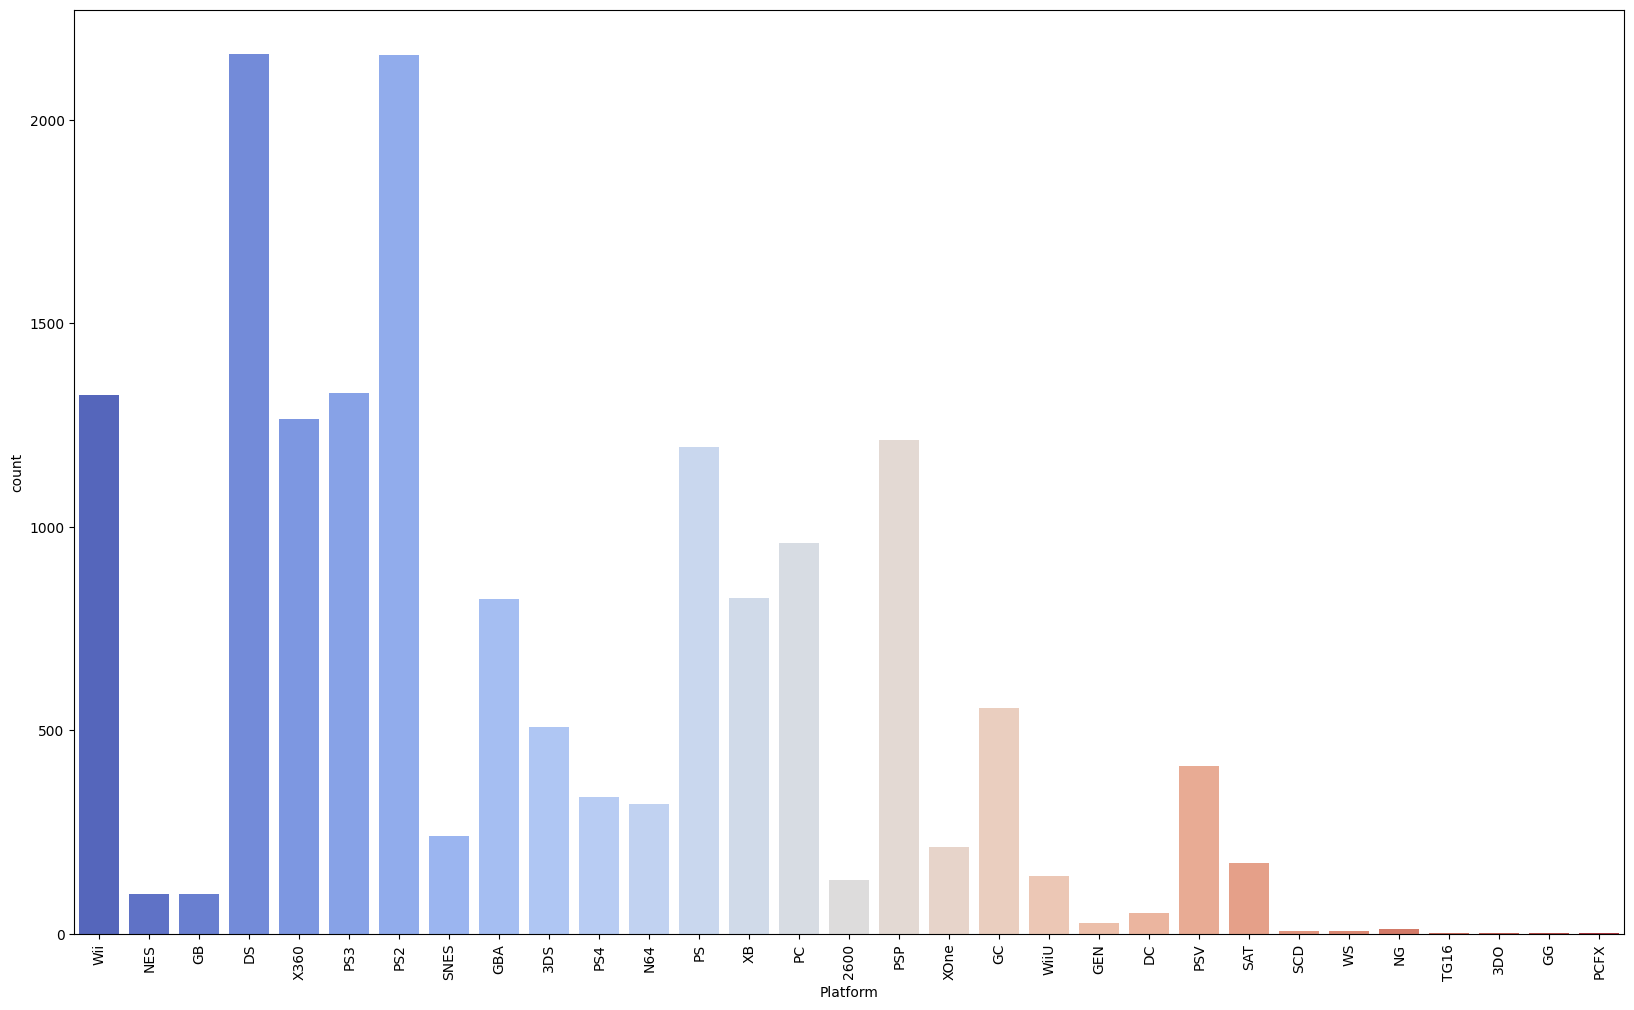

In [48]:
plt.figure(figsize=(20,12))
b=sns.countplot(x= 'Platform' ,data = df ,palette='coolwarm'  )
plt.xticks(rotation=90)
plt.show()

DS, PS2, PS3, Wii, X360, PSP, PS, PC, XB, GBA, GC, 3DS, PSV, PS4, N64, SNES, XOne,
SAT, WiiU, 2600, NES, GB, DC, GEN, NG, SCD, WS, 3DO, TG16, GG, PCFX


### 4. Global Sales of these Platforms?

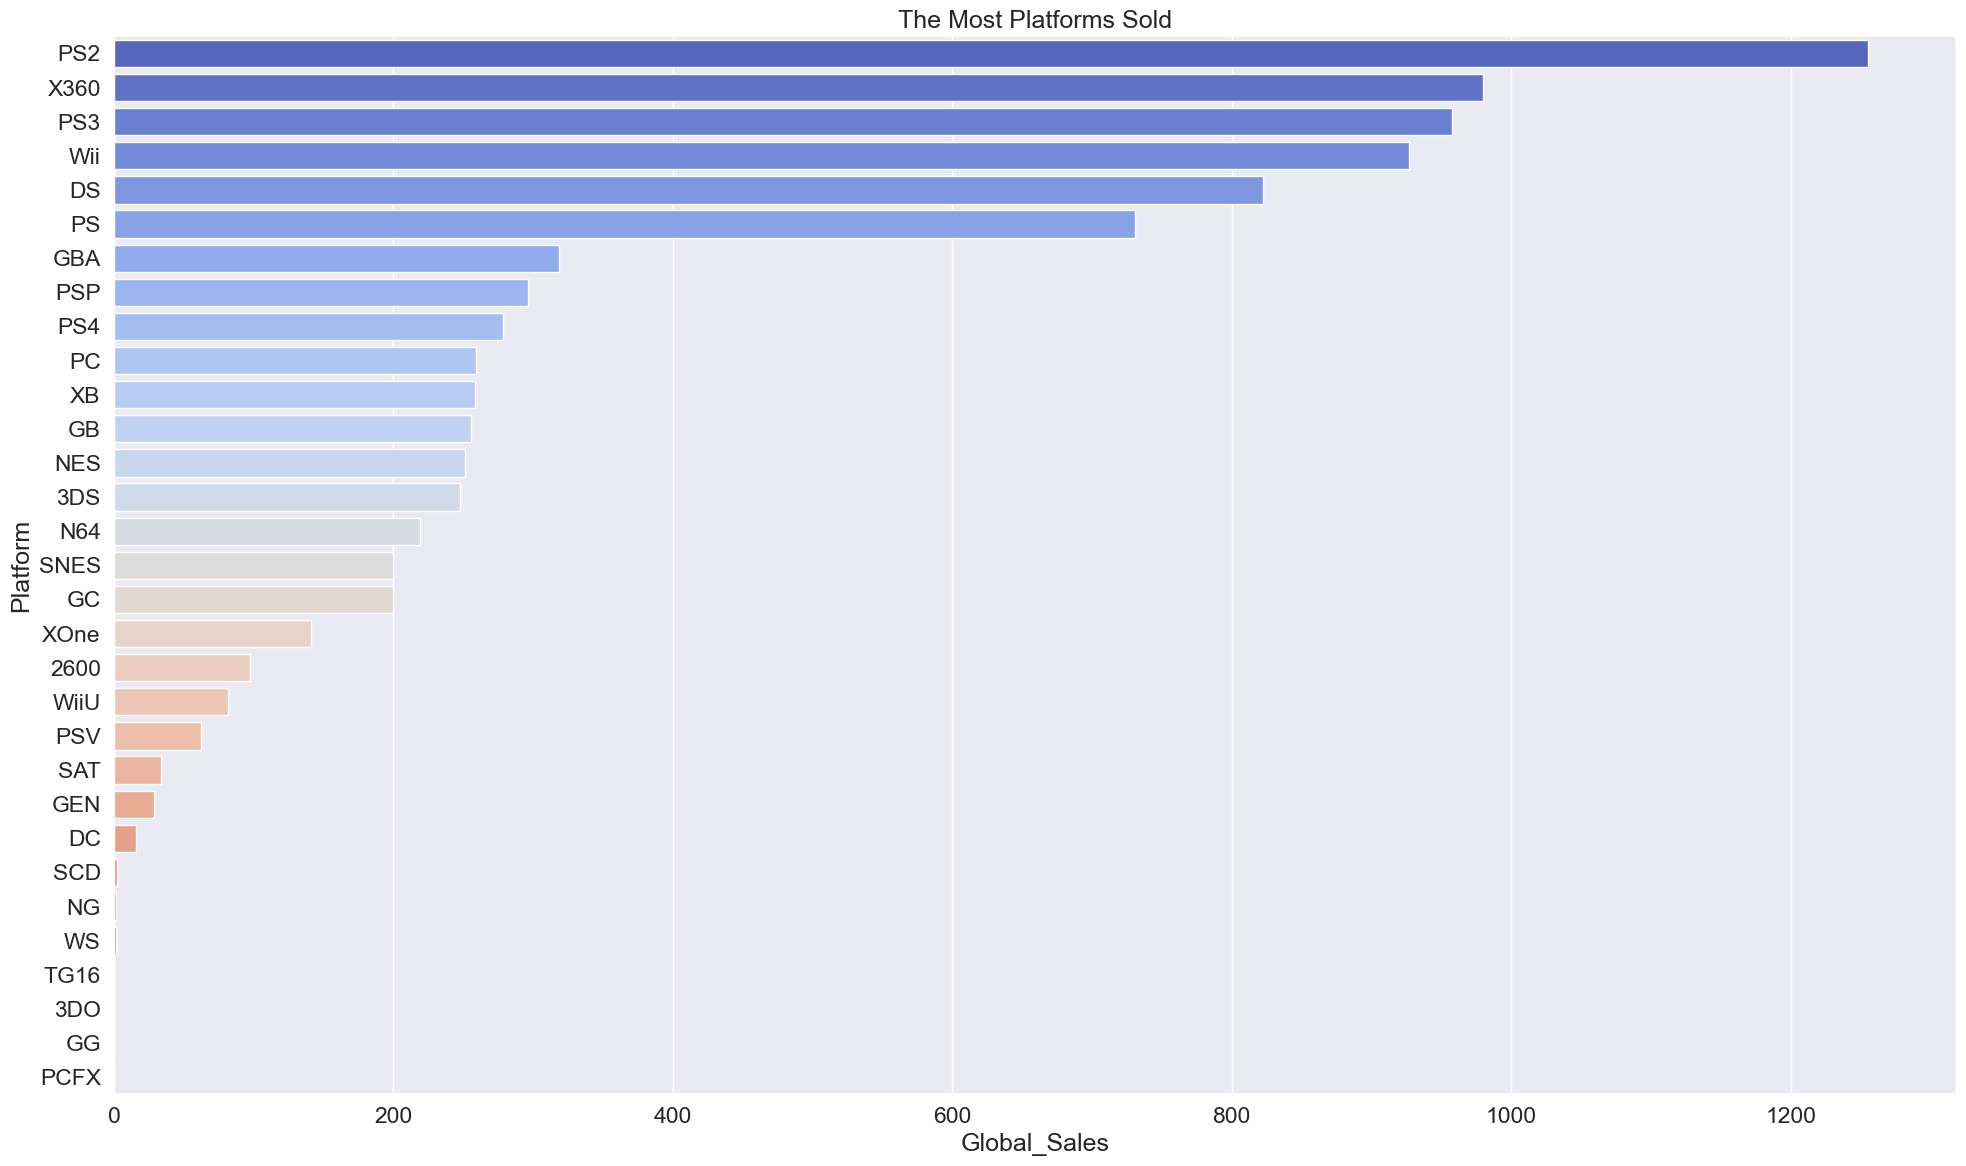

In [54]:
plt.figure(figsize=(20, 12))
sns.set(font_scale = 1.5)
genre=df.groupby(["Platform"])["Global_Sales"].sum().reset_index()
genre=genre.sort_values(by="Global_Sales",ascending=False)
sns.barplot(y="Platform",x="Global_Sales",data=genre,palette='coolwarm' )
plt.title("The Most Platforms Sold")
plt.tight_layout()
plt.show()

PS2 has the highest sales globally

### 5. How many Games were released each year?

In [58]:
# Group the data by year and count the number of games released each year
yearly_releases = df.groupby("Year")["Name"].count()
yearly_releases

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1473
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
Name: Name, dtype: int64

### 6. Trends in Video Game releases each year.

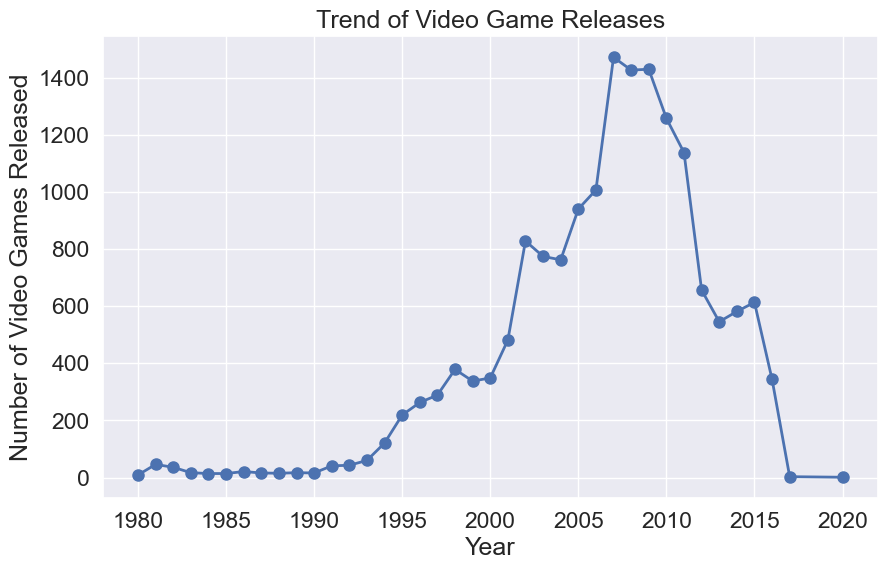

In [59]:
# Create a line chart for the trend of video game releases each year
plt.figure(figsize=(10, 6))
plt.plot(yearly_releases.index, yearly_releases.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel("Year")
plt.ylabel("Number of Video Games Released")
plt.title("Trend of Video Game Releases")
plt.grid(True)
plt.show()


Increasing Trend (2005-2009): The number of video game releases steadily increased from
941 in 2005 to 1473 in 2007, reaching a peak of 1473 in 2007. This period saw a significant
rise in the gaming industry.

Decreasing Trend (2009-2016): After 2009, there was a gradual decline in the number of
game releases. The numbers decreased from 1473 in 2007 to 344 in 2016. This decline could
be attributed to various factors, such as market saturation or shifts in gaming platforms.

Stabilization (2016-2020): After 2016, the number of game releases stabilized around 300-
400 per year. There might be a new balance in the industry, with a consistent number of
games being released annually.

Significant Drops (2017-2020): There was a sharp drop in 2017 with only 3 releases, and in
2020, there was only 1 release. These years might represent a shift in the industry, possibly
due to emerging trends like mobile gaming or changes in consumer preferences.


### 7. What is the distribution of genre in Video Games?

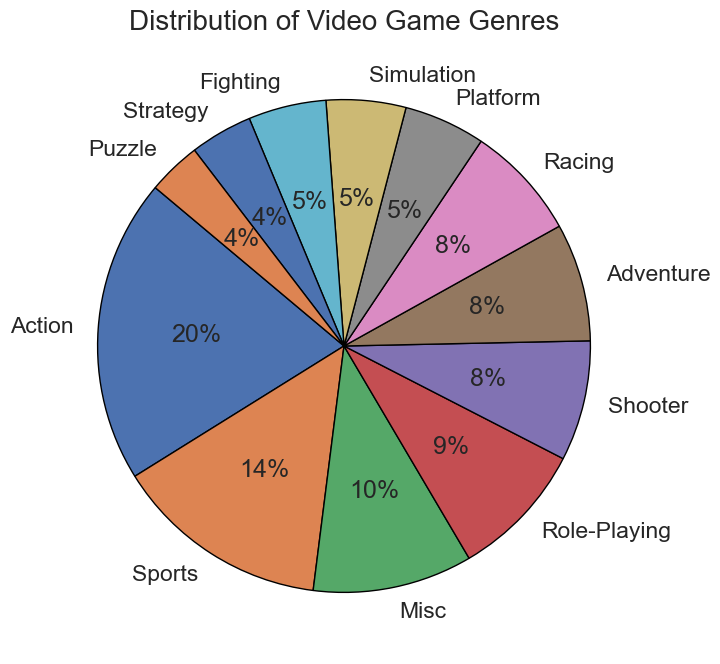

In [63]:
all_genres = df['Genre'].value_counts()

## Plotting the graph
plt.figure(figsize=(8,8))
plt.pie(all_genres, labels=all_genres.index, wedgeprops={"edgecolor":"black"}, autopct='%1.0f%%', startangle=140)

## Title
plt.title('Distribution of Video Game Genres', fontsize=20)

## Display of plot
plt.show()

Action, sports, and misc games dominate the video game market. Role-playing, shooter,
adventure, racing, platform, simulation, and fighting games have moderate popularity.
Strategy and puzzle games have the lowest demand. Each genre appeals to different types of
players and preferences.

### 8. What is the trend of Global Sales each year?

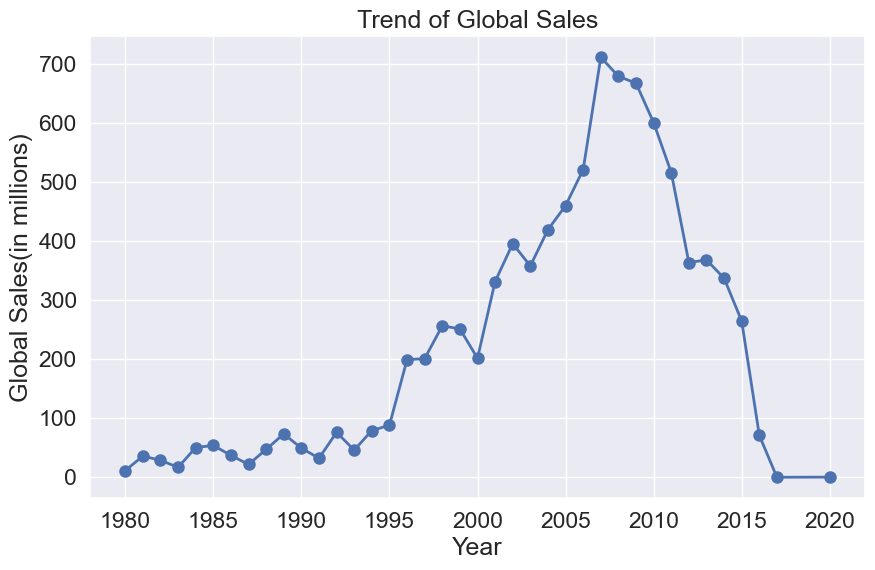

In [65]:
# Group the data by year and sum the global sales for each year
yearly_sales = df.groupby("Year")["Global_Sales"].sum()

# Create a line chart for the trend of global sales each year
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel("Year")
plt.ylabel("Global Sales(in millions)")
plt.title("Trend of Global Sales")
plt.grid(True)
plt.show()


1980s to early 1990s: Global sales started relatively low in the early 1980s, gradually
increased, and then spiked in 1989 and 1994.

The mid-1990s to early 2000s: After the spike in 1994, sales remained consistently high in
the mid to late 1990s and early 2000s, peaking in 1998.

Early 2000s: There was a slight decline in the early 2000s, followed by a significant increase
in 2001 and 2002.

The mid-2000s to 2010s: Sales remained high in the mid-2000s, reaching its peak in 2008,
after which there was a notable decline. The sales gradually stabilized but remained relatively
high until 2010.

2010s to 2020: From 2010 onwards, there was a general downward trend, with sales
decreasing each year. There was a steep decline in 2013, followed by a slight increase in
2014, but the overall trend remained negative.

2016 to 2020: Sales continued to decrease significantly, reaching almost negligible levels in
2017 and remaining extremely low in 2020.

### 9. What is the top-sold Genre in the North American market?


In [68]:
# Group data by genre and calculate total sales for North America
genre_sales_na = df.groupby("Genre")["NA_Sales"].sum()

# Find the genre with the highest sales in North America
top_genre_na = genre_sales_na.idxmax()
top_sales_na = genre_sales_na.max()

print(f"The top-selling genre in North America is '{top_genre_na}' with total sales of {top_sales_na} million copies.")

The top-selling genre in North America is 'Action' with total sales of 877.83 million copies.


In [72]:
genre_sales_na

Genre
Action          877.83
Sports          683.35
Shooter         582.60
Platform        447.05
Misc            410.24
Racing          359.42
Role-Playing    327.28
Fighting        223.59
Simulation      183.31
Puzzle          123.78
Adventure       105.80
Strategy         68.70
Name: NA_Sales, dtype: float64

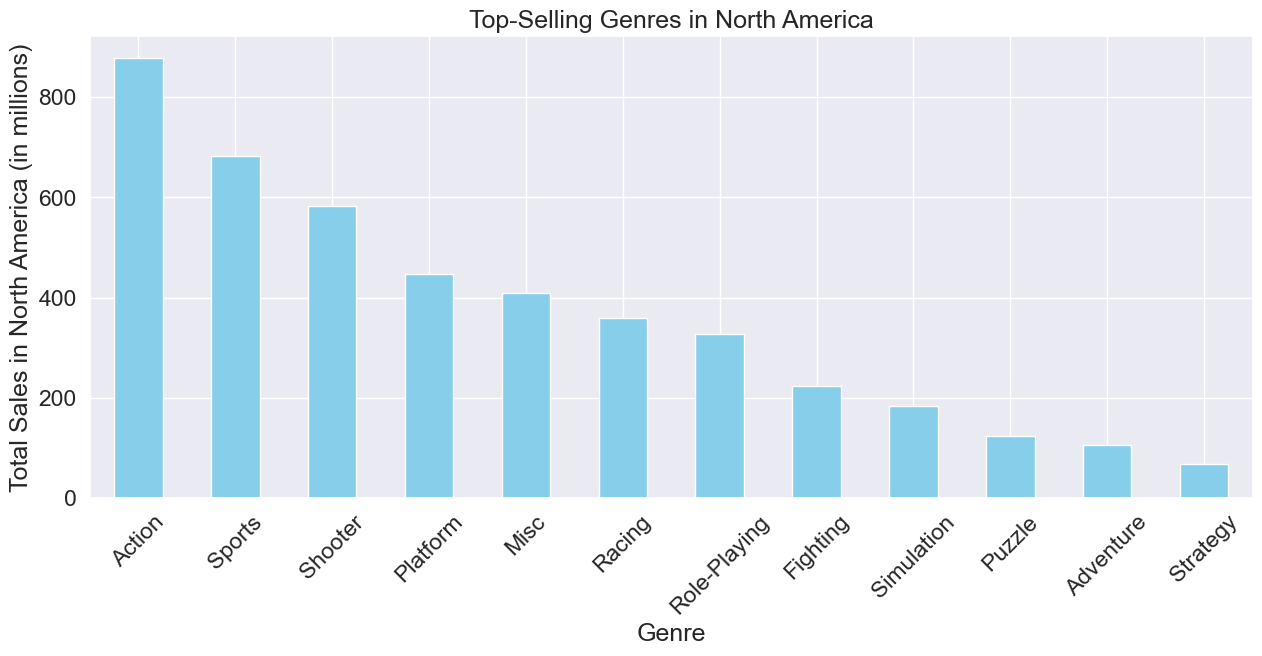

In [69]:
genre_sales_na = genre_sales_na.sort_values(ascending=False)

# Bar plot for top-selling genres in North America
plt.figure(figsize=(15, 6))
genre_sales_na.plot(kind='bar', color='skyblue')
plt.xlabel("Genre")
plt.ylabel("Total Sales in North America (in millions)")
plt.title("Top-Selling Genres in North America")
plt.xticks(rotation=45)
plt.show()

### 10. What is the top-sold Genre in the European market?

In [70]:
# Group data by genre and calculate total sales for Europe
genre_sales_eu = df.groupby("Genre")["EU_Sales"].sum()

# Find the genre with the highest sales in Europe
top_genre_eu = genre_sales_eu.idxmax()
top_sales_eu = genre_sales_eu.max()

print(f"The top-selling genre in Europe is '{top_genre_eu}' with total sales of {top_sales_eu} million copies.")

The top-selling genre in Europe is 'Action' with total sales of 525.0 million copies.


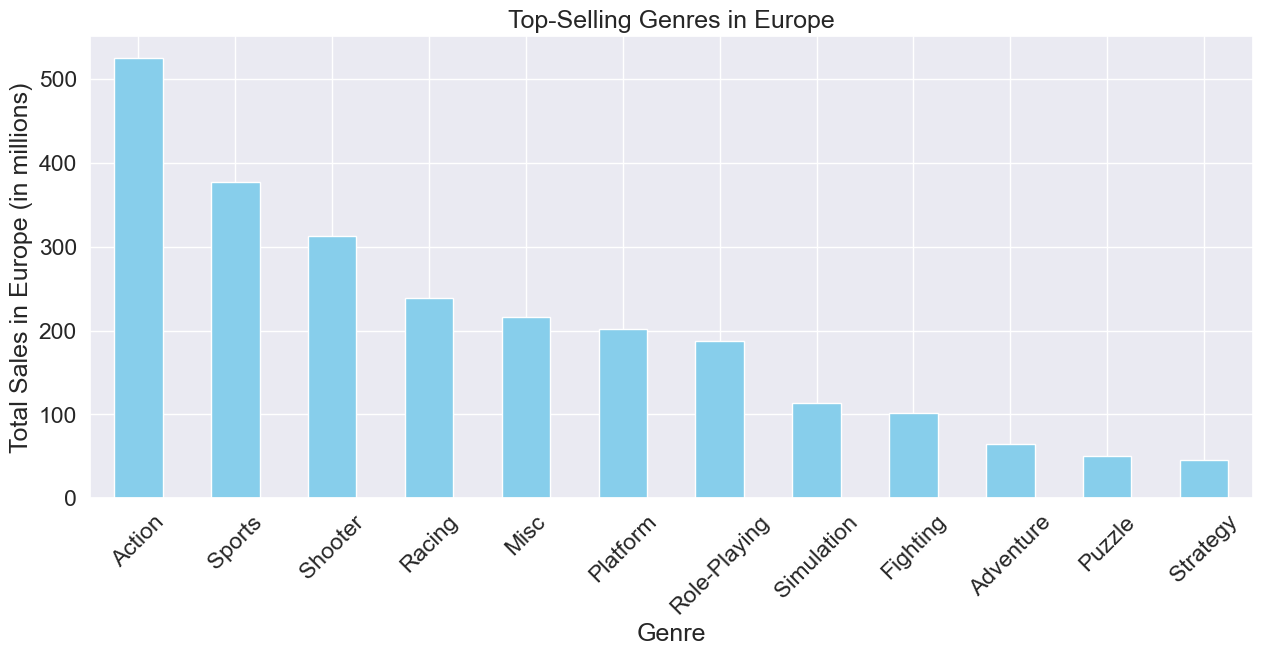

In [71]:
genre_sales_eu = genre_sales_eu.sort_values(ascending=False)

# Bar plot for top-selling genres in Europe
plt.figure(figsize=(15, 6))
genre_sales_eu.plot(kind='bar', color='skyblue')
plt.xlabel("Genre")
plt.ylabel("Total Sales in Europe (in millions)")
plt.title("Top-Selling Genres in Europe")
plt.xticks(rotation=45)
plt.show()

### 11. What is the top-sold Genre in the Japanese market?

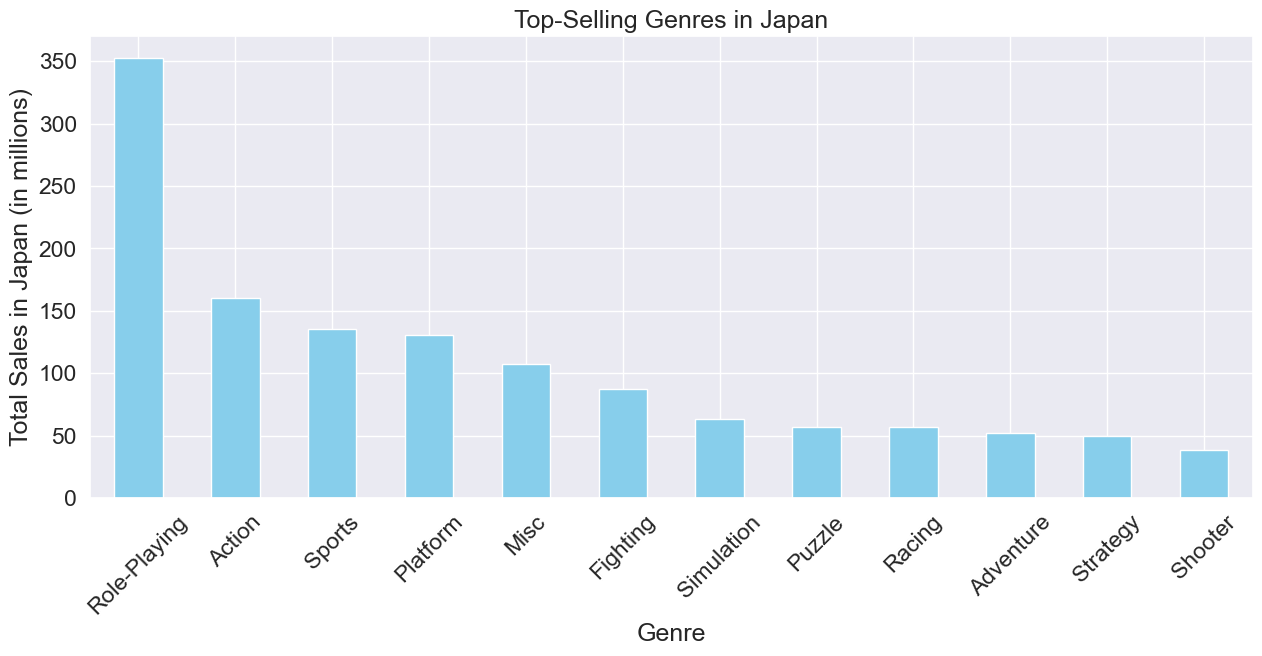

In [74]:
genre_sales_jp = genre_sales_jp.sort_values(ascending=False)

# Bar plot for top-selling genres in Japan
plt.figure(figsize=(15, 6))
genre_sales_jp.plot(kind='bar', color='skyblue')
plt.xlabel("Genre")
plt.ylabel("Total Sales in Japan (in millions)")
plt.title("Top-Selling Genres in Japan")
plt.xticks(rotation=45)
plt.show()

### 12. What is the top-sold Genre in Other Country Markets?

In [75]:
# Group data by genre and calculate total sales for Other 
genre_sales_Other = df.groupby("Genre")["Other_Sales"].sum()

# Find the genre with the highest sales in Other Countries
top_genre_Other = genre_sales_Other.idxmax()
top_sales_Other = genre_sales_Other.max()

print(f"The top-selling genre in Other Countries is '{top_genre_Other}' with total sales of {top_sales_Other} million copies.")

The top-selling genre in Other Countries is 'Action' with total sales of 187.38 million copies.


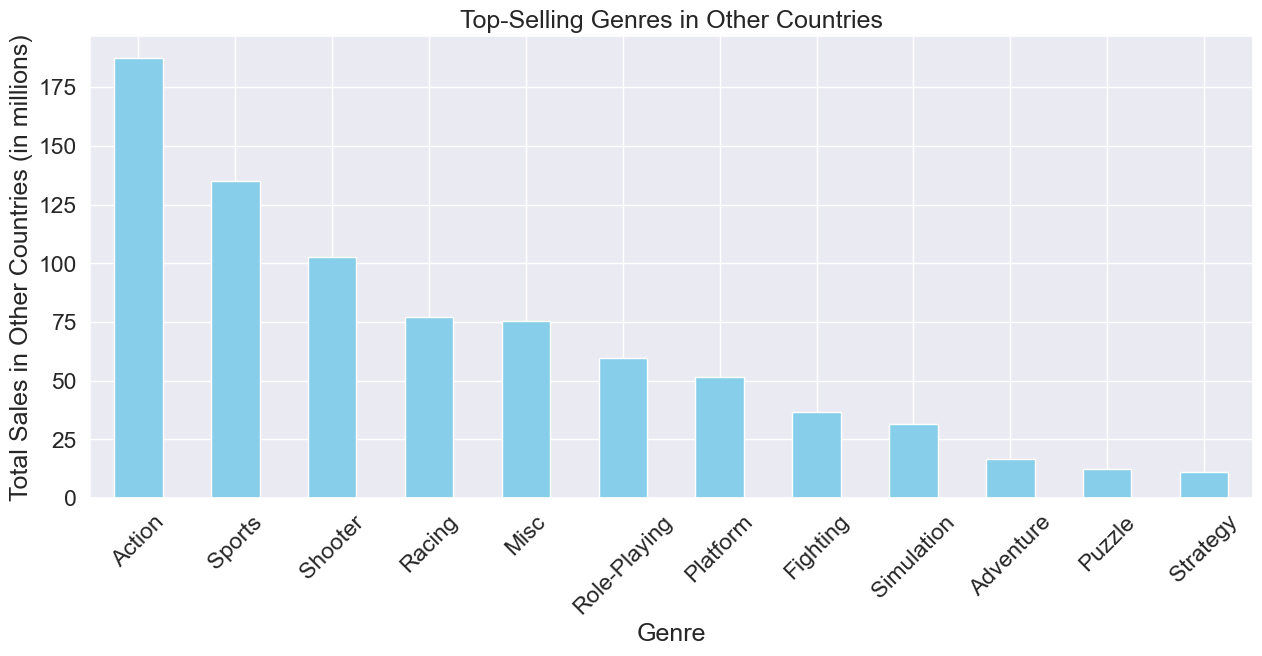

In [76]:
genre_sales_Other = genre_sales_Other.sort_values(ascending=False)

# Bar plot for top-selling genres in Other Countries
plt.figure(figsize=(15, 6))
genre_sales_Other.plot(kind='bar', color='skyblue')
plt.xlabel("Genre")
plt.ylabel("Total Sales in Other Countries (in millions)")
plt.title("Top-Selling Genres in Other Countries")
plt.xticks(rotation=45)
plt.show()

### 13. What is the top-sold Genre in the Global Market?

In [77]:
# Group data by genre and calculate total Global sales  
genre_sales_global = df.groupby("Genre")["Global_Sales"].sum()

# Find the genre with the highest sales Globally
top_genre_global = genre_sales_global.idxmax()
top_sales_global = genre_sales_global.max()

print(f"The top-selling genre Globally is '{top_genre_global}' with total sales of {top_sales_global} million copies.")

The top-selling genre Globally is 'Action' with total sales of 1751.18 million copies.


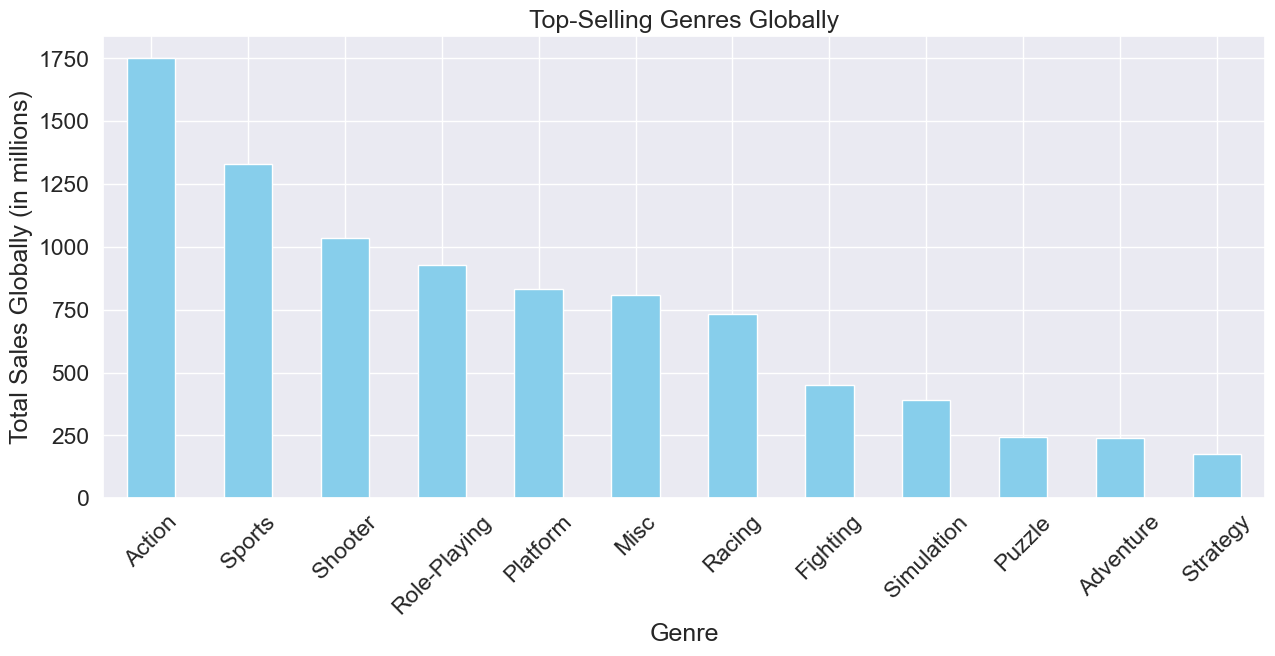

In [78]:
genre_sales_global = genre_sales_global.sort_values(ascending=False)

# Bar plot for top-selling genres Globally
plt.figure(figsize=(15, 6))
genre_sales_global.plot(kind='bar', color='skyblue')
plt.xlabel("Genre")
plt.ylabel("Total Sales Globally (in millions)")
plt.title("Top-Selling Genres Globally")
plt.xticks(rotation=45)
plt.show()

### 14. Top Publishers Who Have Released More Video Games?

In [80]:
df['Publisher'].value_counts()

Publisher
Electronic Arts                 1409
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

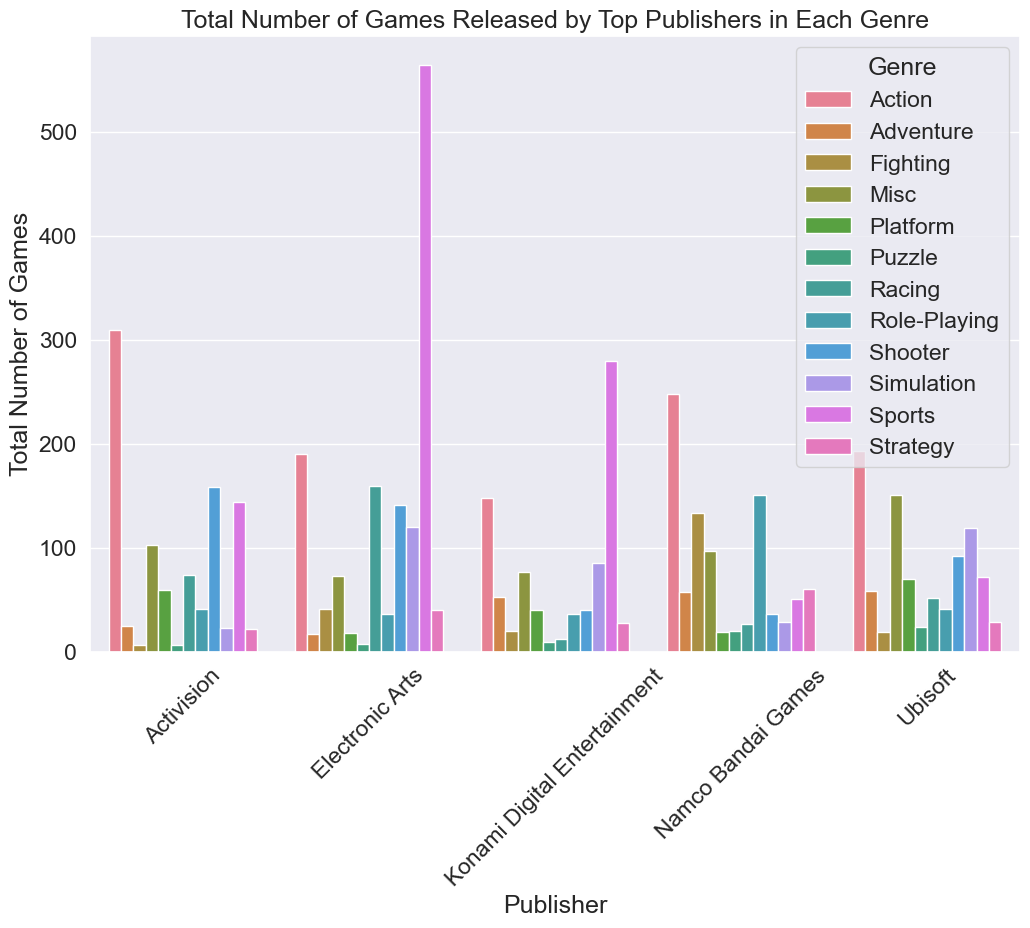

In [151]:
top_publishers = df.groupby('Publisher').size().nlargest(5).index
top_publisher_genre_counts = df[df['Publisher'].isin(top_publishers)].groupby(['Publisher', 'Genre']).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(data=top_publisher_genre_counts, x='Publisher', y='Count', hue='Genre')
plt.xticks(rotation=45)
plt.xlabel('Publisher')
plt.ylabel('Total Number of Games')
plt.title('Total Number of Games Released by Top Publishers in Each Genre')
plt.show()

In [91]:
# Top 10 publishers by global sales
top_publishers = df.Publisher.value_counts().head(10)
top_publishers

Publisher
Electronic Arts                 1409
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: count, dtype: int64

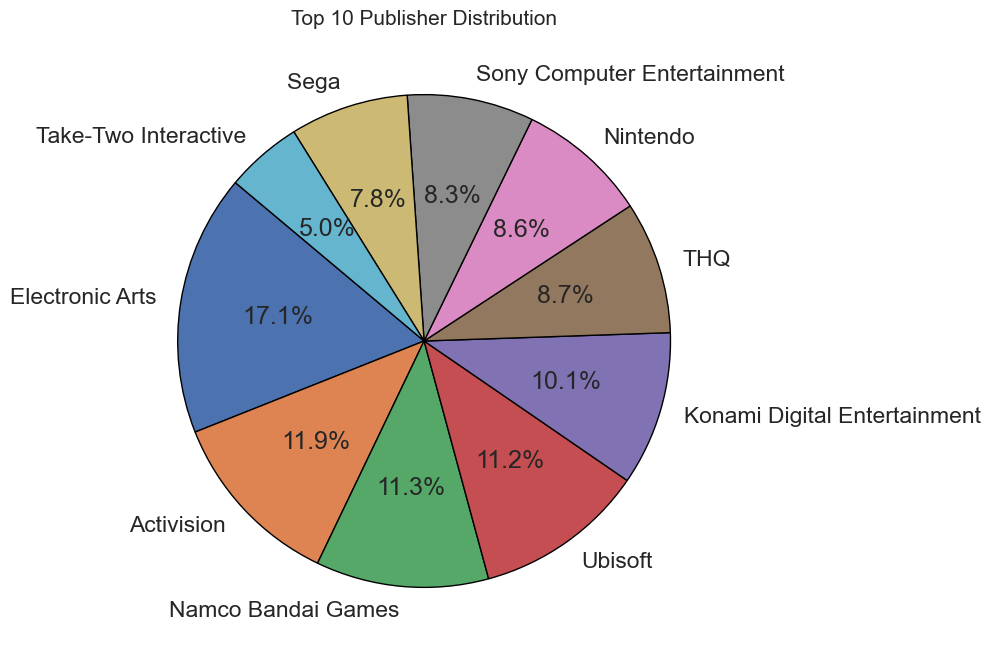

In [92]:
## Plotting graph
plt.figure(figsize=(8,8))

plt.pie(top_publishers, labels=top_publishers.index,wedgeprops={"edgecolor": "black"}, autopct='%1.1f%%', startangle=140)

## Title
plt.title('Top 10 Publisher Distribution', fontsize = 15)

## Display of hte plot
plt.show()

### 15. Top Publishers Who Have Made Most Sales on Video Games?

In [99]:
sales_publisher = df.groupby("Publisher").agg({"Global_Sales": pd.Series.sum})
sales_publisher.nlargest(10, "Global_Sales")

Global_Sales
Publisher                                 
Nintendo                           1786.56
Electronic Arts                    1125.20
Activision                          727.46
Sony Computer Entertainment         607.50
Ubisoft                             474.72
Take-Two Interactive                399.54
THQ                                 340.77
Konami Digital Entertainment        283.64
Sega                                272.99
Namco Bandai Games                  254.09

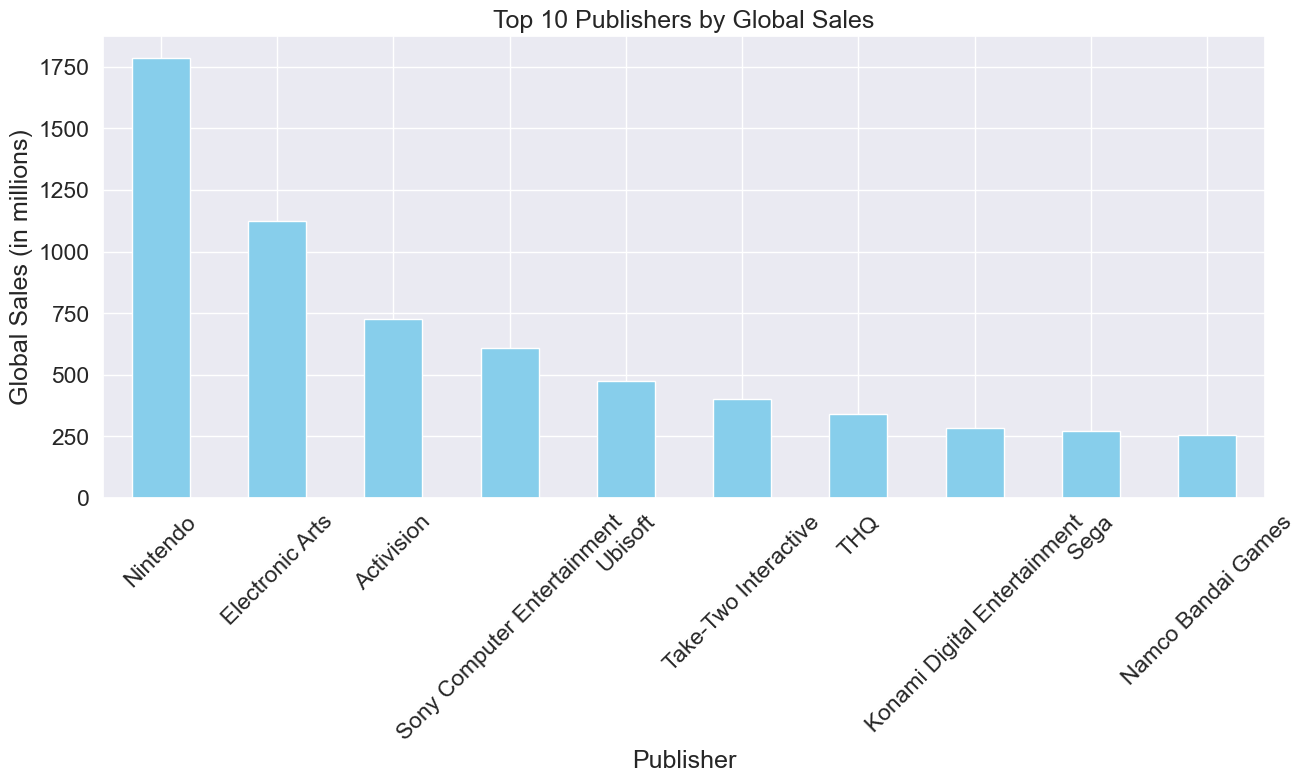

In [102]:
# Group the data by publisher and sum the global sales for each publisher
publisher_sales = df.groupby("Publisher")["Global_Sales"].sum().nlargest(10)

# Create a bar plot for the top 10 publishers by global sales
plt.figure(figsize=(15, 6))
publisher_sales.plot(kind='bar', color='skyblue')
plt.xlabel("Publisher")
plt.ylabel("Global Sales (in millions)")
plt.title("Top 10 Publishers by Global Sales")
plt.xticks(rotation=45)
plt.show()


In [110]:
comp_publisher = df[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']]
comp_publisher.head()

Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0  Nintendo     41.49     29.02      3.77         8.46         82.74
1  Nintendo     29.08      3.58      6.81         0.77         40.24
2  Nintendo     15.85     12.88      3.79         3.31         35.82
3  Nintendo     15.75     11.01      3.28         2.96         33.00
4  Nintendo     11.27      8.89     10.22         1.00         31.37

In [111]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'],value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

Publisher    Sale_Area  Sale_Price
0                      Nintendo     NA_Sales      816.87
1               Electronic Arts     NA_Sales      603.61
2                    Activision     NA_Sales      429.70
3   Sony Computer Entertainment     NA_Sales      265.22
4                       Ubisoft     NA_Sales      253.43
..                          ...          ...         ...
75   Disney Interactive Studios  Other_Sales       13.18
76            Eidos Interactive  Other_Sales        8.02
77                    LucasArts  Other_Sales       10.50
78           Bethesda Softworks  Other_Sales       10.16
79                 Midway Games  Other_Sales        5.74

[80 rows x 3 columns]

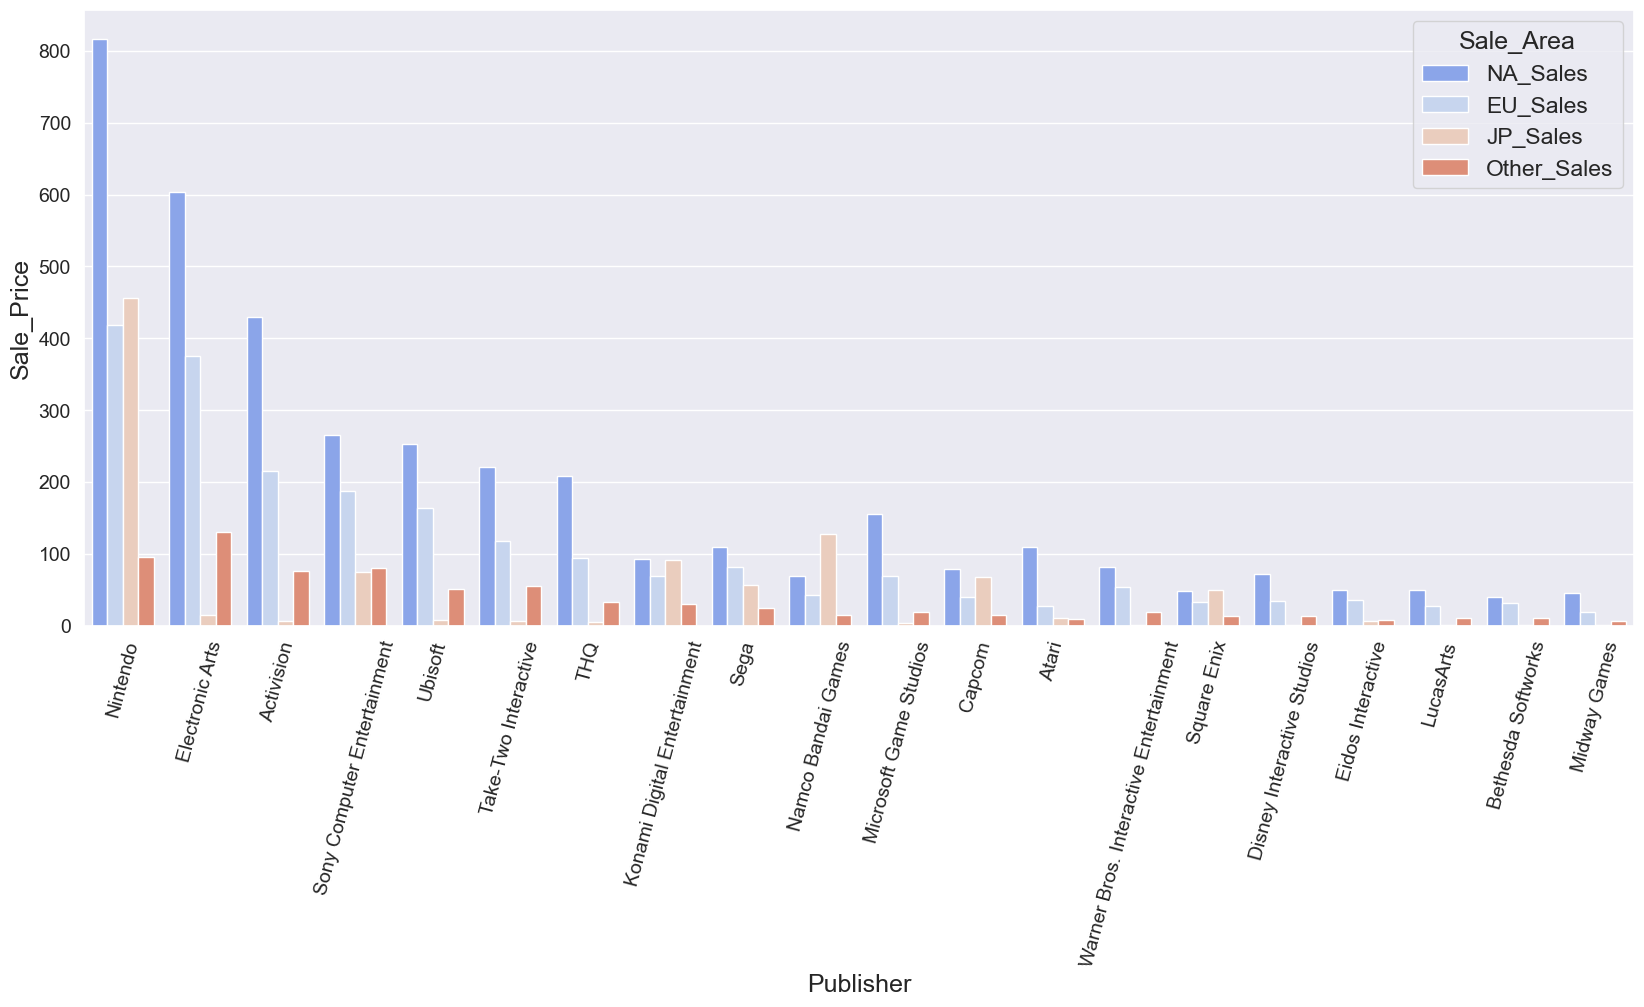

In [112]:
plt.figure(figsize=(20,8))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area',data=comp_publisher,palette='coolwarm' )
plt.xticks(fontsize=14, rotation=75)
plt.yticks(fontsize=14)
plt.show()

### 16. What are the top-selling game genres across different market areas?


In [178]:
# Group data by genre and calculate total sales for each region
genre_sales_by_region = df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales","Global_Sales"]].sum()
genre_sales_by_region

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                                
Action          877.83    525.00    159.95       187.38       1751.18
Adventure       105.80     64.13     52.07        16.81        239.04
Fighting        223.59    101.32     87.35        36.68        448.91
Misc            410.24    215.98    107.76        75.32        809.96
Platform        447.05    201.63    130.77        51.59        831.37
Puzzle          123.78     50.78     57.31        12.55        244.95
Racing          359.42    238.39     56.69        77.27        732.04
Role-Playing    327.28    188.06    352.31        59.61        927.37
Shooter         582.60    313.27     38.28       102.69       1037.37
Simulation      183.31    113.38     63.70        31.52        392.20
Sports          683.35    376.85    135.37       134.97       1330.93
Strategy         68.70     45.34     49.46        11.36        175.12

In [113]:
genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
top_na_genre = genre_sales['NA_Sales'].idxmax()
top_eu_genre = genre_sales['EU_Sales'].idxmax()
top_jp_genre = genre_sales['JP_Sales'].idxmax()
top_other_genre = genre_sales['Other_Sales'].idxmax()
print(f'Top-selling genre in North America: {top_na_genre}')
print(f'Top-selling genre in Europe: {top_eu_genre}')
print(f'Top-selling genre in Japan: {top_jp_genre}')
print(f'Top-selling genre in Other countries: {top_other_genre}')


Top-selling genre in North America: Action
Top-selling genre in Europe: Action
Top-selling genre in Japan: Role-Playing
Top-selling genre in Other countries: Action


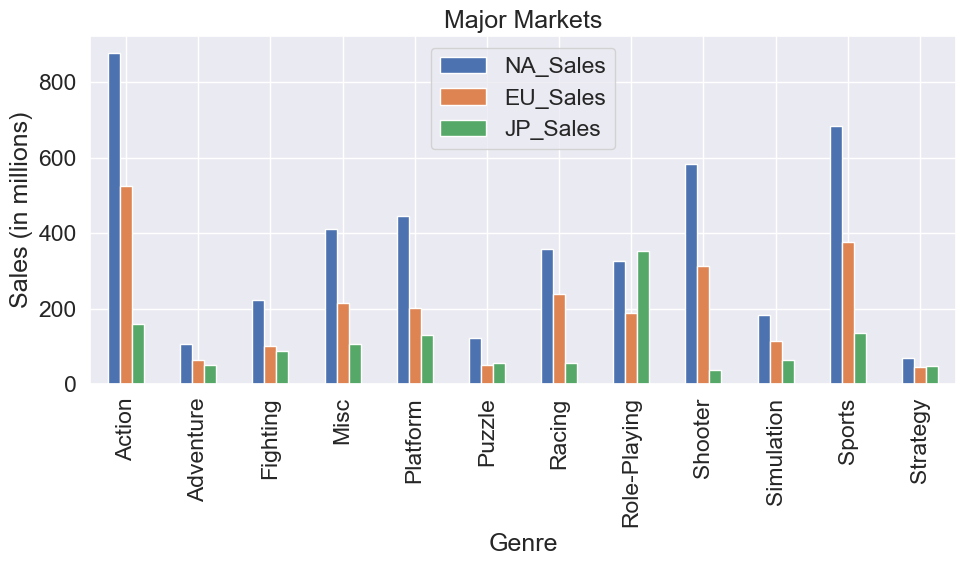

In [117]:
genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

# Create a bar graph
genre_sales.plot(kind='bar',figsize=(10, 6))

## Title
plt.title('Major Markets')

## Labels
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')

## Rotation
plt.xticks(rotation=90)

plt.legend()

plt.tight_layout()
# Show the plot
plt.show()


### 17. Regional Analysis

In [184]:
highest_na_sales = df.loc[df.groupby('Genre')['NA_Sales'].idxmax()][['Name', 'Genre','Publisher','Year','NA_Sales']]
highest_na_sales = highest_na_sales.sort_values(by='NA_Sales', ascending=False)
highest_na_sales

Name         Genre               Publisher  \
0                            Wii Sports        Sports                Nintendo   
1                     Super Mario Bros.      Platform                Nintendo   
9                             Duck Hunt       Shooter                Nintendo   
5                                Tetris        Puzzle                Nintendo   
2                        Mario Kart Wii        Racing                Nintendo   
15                   Kinect Adventures!          Misc  Microsoft Game Studios   
4              Pokemon Red/Pokemon Blue  Role-Playing                Nintendo   
23                   Grand Theft Auto V        Action    Take-Two Interactive   
10                           Nintendogs    Simulation                Nintendo   
39              Super Smash Bros. Brawl      Fighting                Nintendo   
50   Super Mario Land 2: 6 Golden Coins     Adventure                Nintendo   
165                     Pokemon Stadium      Strategy                Nintendo   

       Year  NA_Sales  
0    2006.0     41.49  
1    1985.0     29.08  
9    1984.0     26.93  
5    1989.0     23.20  
2    2008.0     15.85  
15   2010.0     14.97  
4    1996.0     11.27  
23   2013.0      9.63  
10   2005.0      9.07  
39   2008.0      6.75  
50   1992.0      6.16  
165  1999.0      3.18

#### 1. Nintendo dominates the list as the publisher of 10 out of 12 games being highest sold
#### 2. Sports is the most popular genre in North America, with Wii Sports having the highest sales of all games.
#### 3. Shooter and Action are the only genres that have non-Nintendo games as the top sellers, namely Duck Hunt and Grand Theft Auto V. 

In [185]:
highest_eu_sales = df.loc[df.groupby('Genre')['EU_Sales'].idxmax()][['Name', 'Genre','Publisher','Year','EU_Sales']]
highest_eu_sales = highest_eu_sales.sort_values(by='EU_Sales', ascending=False)
highest_eu_sales

Name         Genre  \
0                                      Wii Sports        Sports   
2                                  Mario Kart Wii        Racing   
10                                     Nintendogs    Simulation   
16                             Grand Theft Auto V        Action   
19   Brain Age: Train Your Brain in Minutes a Day          Misc   
6                           New Super Mario Bros.      Platform   
4                        Pokemon Red/Pokemon Blue  Role-Playing   
34                     Call of Duty: Black Ops II       Shooter   
27    Brain Age 2: More Training in Minutes a Day        Puzzle   
521                                          Myst     Adventure   
39                        Super Smash Bros. Brawl      Fighting   
267                Warcraft II: Tides of Darkness      Strategy   

                Publisher    Year  EU_Sales  
0                Nintendo  2006.0     29.02  
2                Nintendo  2008.0     12.88  
10               Nintendo  2005.0     11.00  
16   Take-Two Interactive  2013.0      9.27  
19               Nintendo  2005.0      9.26  
6                Nintendo  2006.0      9.23  
4                Nintendo  1996.0      8.89  
34             Activision  2012.0      5.88  
27               Nintendo  2005.0      5.36  
521               Red Orb  1994.0      2.79  
39               Nintendo  2008.0      2.61  
267            Activision  1995.0      2.27

#### 1. Nintendo is also the dominant publisher in Europe, with 8 out of 12 games being highest sold.
#### 2. Sports and Racing are the most popular genres in Europe, with Wii Sports and Mario Kart Wii having the highest sales of all games.
#### 3. Simulation and Puzzle are only genres that have different top sellers in Europe than in North America, namely Nintendogs and Brain Age2.

In [186]:
highest_jp_sales = df.loc[df.groupby('Genre')['JP_Sales'].idxmax()][['Name', 'Genre','Publisher','Year','JP_Sales']]
highest_jp_sales = highest_jp_sales.sort_values(by='JP_Sales', ascending=False)
highest_jp_sales

Name         Genre  \
4                         Pokemon Red/Pokemon Blue  Role-Playing   
1                                Super Mario Bros.      Platform   
41                     Animal Crossing: Wild World    Simulation   
27     Brain Age 2: More Training in Minutes a Day        Puzzle   
19    Brain Age: Train Your Brain in Minutes a Day          Misc   
11                                   Mario Kart DS        Racing   
45            Pokemon HeartGold/Pokemon SoulSilver        Action   
0                                       Wii Sports        Sports   
136           Street Fighter II: The World Warrior      Fighting   
50              Super Mario Land 2: 6 Golden Coins     Adventure   
1143                       Yu-Gi-Oh! Duel Monsters      Strategy   
235                                       Splatoon       Shooter   

                         Publisher    Year  JP_Sales  
4                         Nintendo  1996.0     10.22  
1                         Nintendo  1985.0      6.81  
41                        Nintendo  2005.0      5.33  
27                        Nintendo  2005.0      5.32  
19                        Nintendo  2005.0      4.16  
11                        Nintendo  2005.0      4.13  
45                        Nintendo  2009.0      3.96  
0                         Nintendo  2006.0      3.77  
136                         Capcom  1992.0      2.87  
50                        Nintendo  1992.0      2.69  
1143  Konami Digital Entertainment  1998.0      1.61  
235                       Nintendo  2015.0      1.44

#### 1. Role-Playing is the most popular genre in Japan, with Pokemon Red/Pokemon Blue having the highest sales of all games.
#### 2. Nintendo is also the dominant publisher in Japan, with 10 out of 12 games being highest sold.
#### 3. Animal Crossing: Wild World and Splatoon are the only games that have higher sales in Japan than in other regions, indicating a strong local preference.

In [187]:
highest_other_sales = df.loc[df.groupby('Genre')['Other_Sales'].idxmax()][['Name', 'Genre','Publisher','Year','Other_Sales']]
highest_other_sales = highest_other_sales.sort_values(by='Other_Sales', ascending=False)
highest_other_sales

Name         Genre  \
17                 Grand Theft Auto: San Andreas        Action   
0                                     Wii Sports        Sports   
47                                Gran Turismo 4        Racing   
6                          New Super Mario Bros.      Platform   
7                                       Wii Play          Misc   
10                                    Nintendogs    Simulation   
34                    Call of Duty: Black Ops II       Shooter   
147                            Final Fantasy XII  Role-Playing   
676                    WWE SmackDown vs Raw 2008      Fighting   
27   Brain Age 2: More Training in Minutes a Day        Puzzle   
218                             Assassin's Creed     Adventure   
217               StarCraft II: Wings of Liberty      Strategy   

                       Publisher    Year  Other_Sales  
17          Take-Two Interactive  2004.0        10.57  
0                       Nintendo  2006.0         8.46  
47   Sony Computer Entertainment  2004.0         7.53  
6                       Nintendo  2006.0         2.90  
7                       Nintendo  2006.0         2.85  
10                      Nintendo  2005.0         2.75  
34                    Activision  2012.0         2.52  
147                  Square Enix  2006.0         1.74  
676                          THQ  2007.0         1.41  
27                      Nintendo  2005.0         1.18  
218                      Ubisoft  2007.0         0.83  
217                   Activision  2010.0         0.59

#### 1. Nintendo is also the dominant publisher in other countries, with 5 out of 12 games being highest sold.
#### 2. Action and Sports are the most popular genres in this region, with Grand Theft Auto: San Andreas and Wii Sports having the highest sales of all games.

### 18. Analysis on Third Highest global Sales Publisher

In [152]:
## Selecting all 'Activision' from 'Publisher'
Publisher_Activision   = df[df['Publisher'] == 'Activision']

columns_to_include = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 
                      'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

Activision_games = Publisher_Activision[columns_to_include]

Activision_games


Rank                                               Name Platform  \
29        30                     Call of Duty: Modern Warfare 3     X360   
31        32                            Call of Duty: Black Ops     X360   
33        34                          Call of Duty: Black Ops 3      PS4   
34        35                         Call of Duty: Black Ops II      PS3   
35        36                         Call of Duty: Black Ops II     X360   
...      ...                                                ...      ...   
16411  16414                 Teenage Mutant Ninja Turtles (3DS)      3DS   
16444  16447                        Madagascar: Escape 2 Africa       PC   
16501  16504  Transformers: War for Cybertron (XBox 360, PS3...       PC   
16537  16540                    Transformers: Fall of Cybertron       PC   
16595  16598   SCORE International Baja 1000: The Official Game      PS2   

         Year    Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
29     2011.0  Shooter  Activision      9.03      4.28      0.13         1.32   
31     2010.0  Shooter  Activision      9.67      3.73      0.11         1.13   
33     2015.0  Shooter  Activision      5.77      5.81      0.35         2.31   
34     2012.0  Shooter  Activision      4.99      5.88      0.65         2.52   
35     2012.0  Shooter  Activision      8.25      4.30      0.07         1.12   
...       ...      ...         ...       ...       ...       ...          ...   
16411  2013.0   Action  Activision      0.01      0.00      0.00         0.00   
16444  2008.0   Action  Activision      0.01      0.00      0.00         0.00   
16501  2010.0  Shooter  Activision      0.01      0.00      0.00         0.00   
16537  2012.0   Action  Activision      0.01      0.00      0.00         0.00   
16595  2008.0   Racing  Activision      0.00      0.00      0.00         0.00   

       Global_Sales  
29            14.76  
31            14.64  
33            14.24  
34            14.03  
35            13.73  
...             ...  
16411          0.01  
16444          0.01  
16501          0.01  
16537          0.01  
16595          0.01  

[975 rows x 11 columns]

#### IN Global Market

In [154]:
## Extract the games with highest Global_Sales
highest_global_sales = Activision_games.groupby('Genre')['Global_Sales'].idxmax()

highest_global_sales = Activision_games.loc[highest_global_sales][['Name', 'Genre', 'Global_Sales']]

highest_global_sales = highest_global_sales.sort_values(by='Global_Sales', ascending=False)

highest_global_sales

Name         Genre  Global_Sales
29      Call of Duty: Modern Warfare 3       Shooter         14.76
137                  World of Warcraft  Role-Playing          6.28
202             Tony Hawk's Pro Skater        Sports          5.02
207   Guitar Hero III: Legends of Rock          Misc          4.98
217     StarCraft II: Wings of Liberty      Strategy          4.83
239                           Pitfall!      Platform          4.50
241              Spider-Man: The Movie        Action          4.48
1002            Star Wars: Starfighter    Simulation          1.76
1622                       Vigilante 8        Racing          1.23
2669                            Boxing      Fighting          0.77
2809                            iCarly     Adventure          0.73
4337                      Ghostbusters        Puzzle          0.45

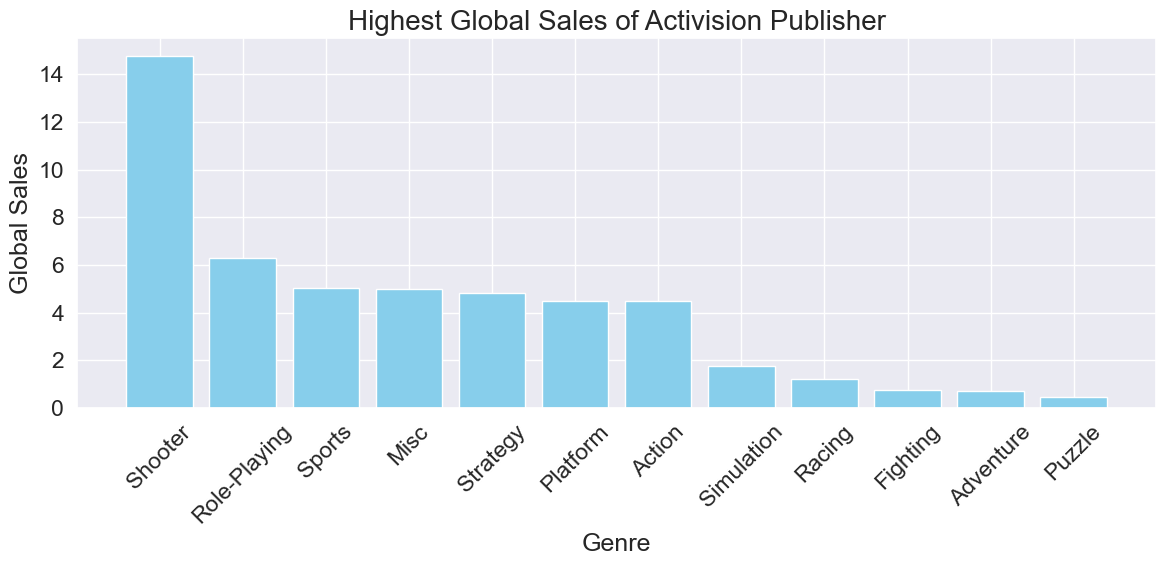

In [155]:
plt.figure(figsize=(12, 6))

## Plot
plt.bar(highest_global_sales['Genre'], highest_global_sales['Global_Sales'], color='skyblue')

## Labels
plt.xlabel('Genre')
plt.ylabel('Global Sales')

## Axis
plt.title('Highest Global Sales of Activision Publisher', size = 20)

## Rotation of axis
plt.xticks(rotation=45)

plt.tight_layout()
##Display of graph
plt.show()

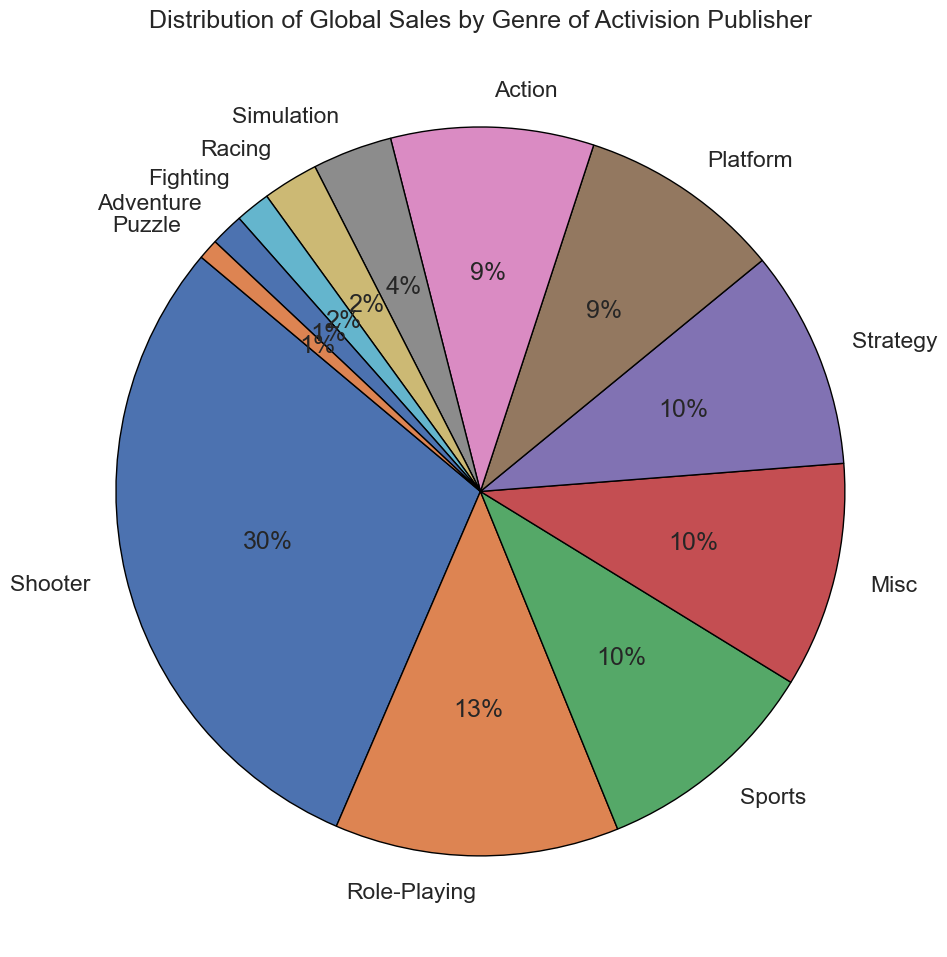

In [156]:
plt.figure(figsize=(10,10))
## plot
plt.pie(highest_global_sales['Global_Sales'], labels=highest_global_sales['Genre'],wedgeprops={"edgecolor": "black"}, autopct='%1.0f%%', startangle=140)
## Title
plt.title('Distribution of Global Sales by Genre of Activision Publisher')

plt.tight_layout()
## Display of Plot
plt.show()

#### In North America Market


In [157]:
## Extract the games with highest NA_Sales
highest_na_sales = Activision_games.groupby('Genre')['NA_Sales'].idxmax()

highest_na_sales = Activision_games.loc[highest_na_sales][['Name', 'Genre', 'NA_Sales']]

highest_na_sales = highest_na_sales.sort_values(by='NA_Sales', ascending=False)

highest_na_sales

Name         Genre  NA_Sales
31                   Call of Duty: Black Ops       Shooter      9.67
239                                 Pitfall!      Platform      4.21
207         Guitar Hero III: Legends of Rock          Misc      3.49
202                   Tony Hawk's Pro Skater        Sports      3.42
241                    Spider-Man: The Movie        Action      2.71
288   World of Warcraft: The Burning Crusade  Role-Playing      2.57
217           StarCraft II: Wings of Liberty      Strategy      2.56
2669                                  Boxing      Fighting      0.72
1622                             Vigilante 8        Racing      0.68
2008                             ZhuZhu Pets    Simulation      0.68
2809                                  iCarly     Adventure      0.67
4337                            Ghostbusters        Puzzle      0.42

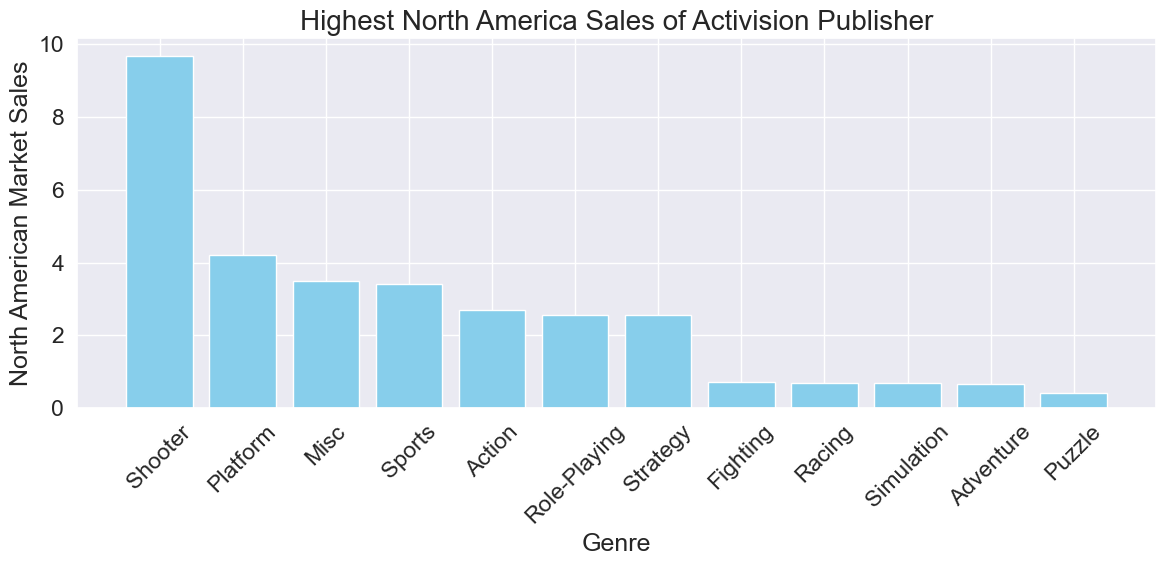

In [158]:
## Plot
plt.figure(figsize=(12, 6))

plt.bar(highest_na_sales['Genre'], highest_na_sales['NA_Sales'], color='skyblue')

## Labels
plt.xlabel('Genre')

plt.ylabel('North American Market Sales')

## Title
plt.title('Highest North America Sales of Activision Publisher', size = 20)

## Rotating the axis
plt.xticks(rotation=45)

plt.tight_layout()

## Display of plot
plt.show()

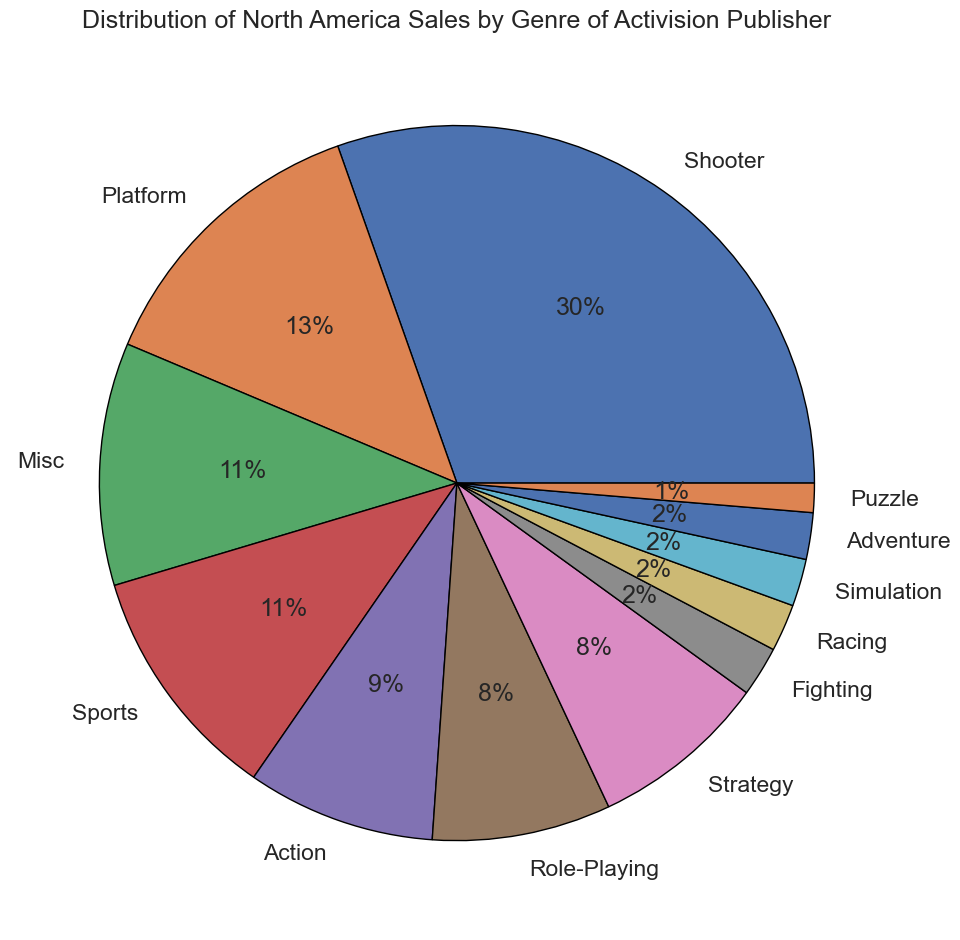

In [159]:
## Plot
plt.figure(figsize=(10,10))

plt.pie(highest_na_sales['NA_Sales'], labels=highest_na_sales['Genre'],wedgeprops={"edgecolor": "black"}, autopct='%1.0f%%')

## Title
plt.title('Distribution of North America Sales by Genre of Activision Publisher')

plt.tight_layout()

## Display of Graph
plt.show()

#### in European Market

In [161]:
## Extract the games with highest EU_Sales
highest_eu_sales = Activision_games.groupby('Genre')['EU_Sales'].idxmax()

highest_eu_sales = Activision_games.loc[highest_eu_sales][['Name', 'Genre', 'EU_Sales']]

highest_eu_sales = highest_eu_sales.sort_values(by='EU_Sales', ascending=False)

highest_eu_sales

Name         Genre  EU_Sales
137                  World of Warcraft  Role-Playing      6.21
34          Call of Duty: Black Ops II       Shooter      5.88
267     Warcraft II: Tides of Darkness      Strategy      2.27
241              Spider-Man: The Movie        Action      1.51
225           Tony Hawk's Pro Skater 2        Sports      1.41
230   Guitar Hero III: Legends of Rock          Misc      1.12
1002            Star Wars: Starfighter    Simulation      0.87
675              Skylanders SWAP Force      Platform      0.83
1622                       Vigilante 8        Racing      0.47
2840           X-Men: Mutant Academy 2      Fighting      0.27
3475            Shrek 2: Beg for Mercy     Adventure      0.15
6663              Bomberman Tournament        Puzzle      0.04

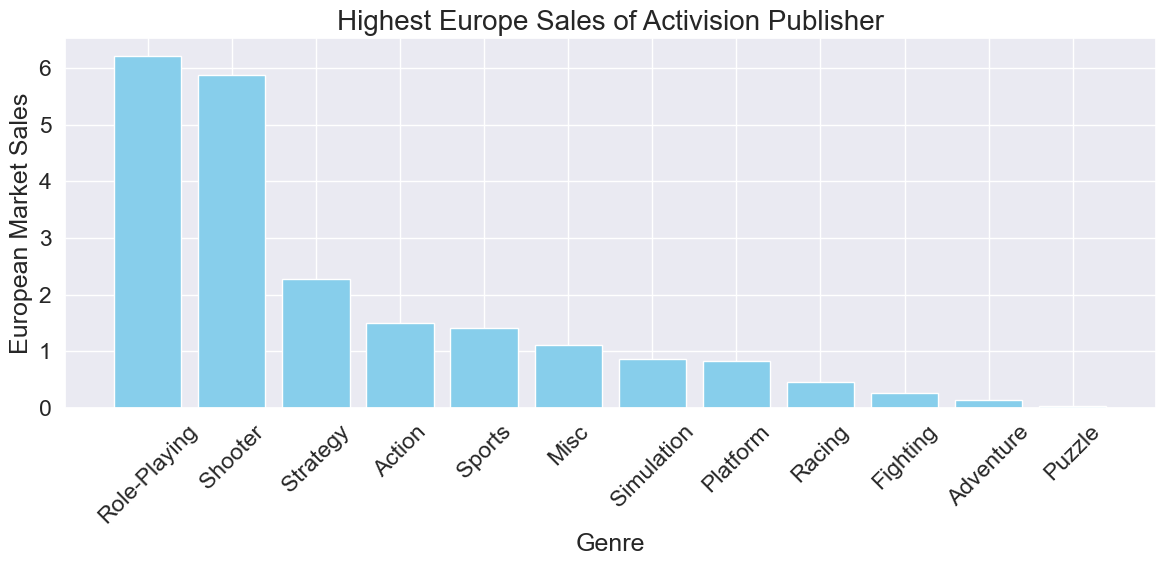

In [162]:
## plot
plt.figure(figsize=(12, 6))

plt.bar(highest_eu_sales['Genre'], highest_eu_sales['EU_Sales'], color='skyblue')

## Labels
plt.xlabel('Genre')
plt.ylabel('European Market Sales')

##Title
plt.title('Highest Europe Sales of Activision Publisher', size = 20)
## Rotation of axis
plt.xticks(rotation=45)

plt.tight_layout()
## Display of Graph
plt.show()

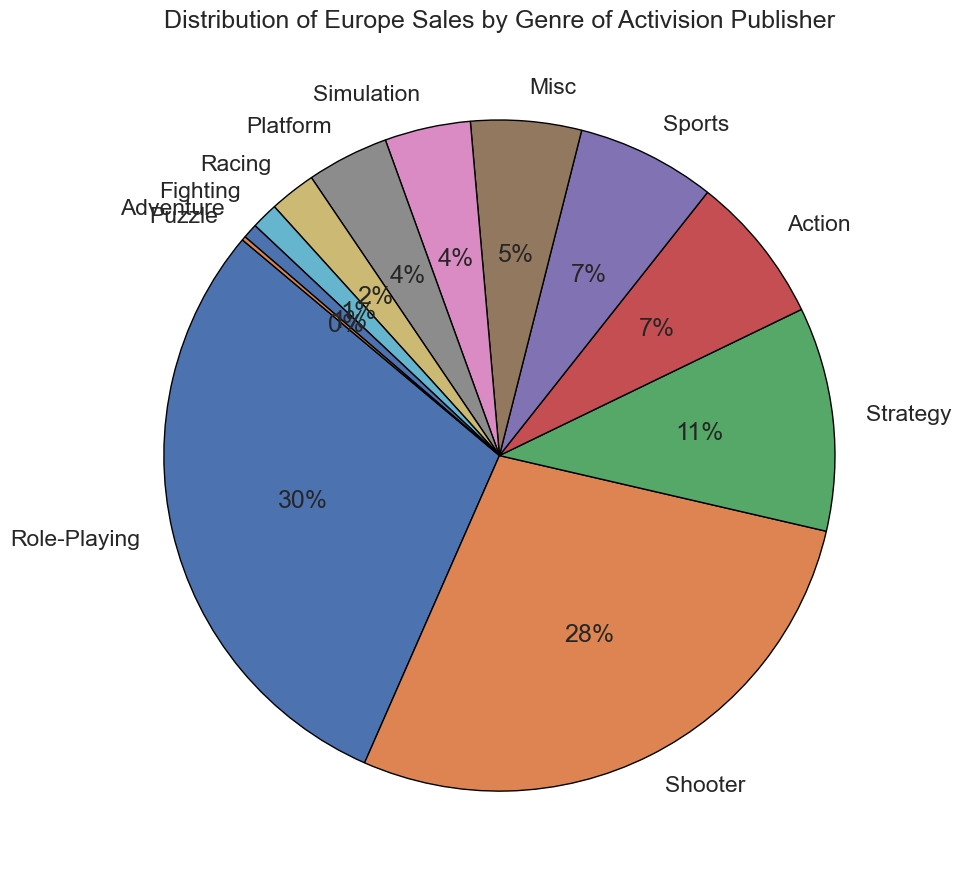

In [163]:
## Plot
plt.figure(figsize=(10,10))

plt.pie(highest_eu_sales['EU_Sales'], labels=highest_eu_sales['Genre'],wedgeprops={"edgecolor": "black"}, autopct='%1.0f%%', startangle=140)

## Title
plt.title('Distribution of Europe Sales by Genre of Activision Publisher')

plt.tight_layout()
## Display of plot
plt.show()

#### in Japan Market

In [164]:
## Extract the games with highest JP_Sales
highest_jp_sales = Activision_games.groupby('Genre')['JP_Sales'].idxmax()

highest_jp_sales = Activision_games.loc[highest_jp_sales][['Name', 'Genre', 'JP_Sales']]

highest_jp_sales = highest_jp_sales.sort_values(by='JP_Sales', ascending=False)

highest_jp_sales

Name         Genre  JP_Sales
34           Call of Duty: Black Ops II       Shooter      0.65
851           Tenchu: Stealth Assassins        Action      0.27
826                          Diablo III  Role-Playing      0.15
10538                      Blue Stinger     Adventure      0.10
6663               Bomberman Tournament        Puzzle      0.10
925                             Shrek 2      Platform      0.03
710    Guitar Hero III: Legends of Rock          Misc      0.02
2775                               Blur        Racing      0.02
1002             Star Wars: Starfighter    Simulation      0.02
202              Tony Hawk's Pro Skater        Sports      0.02
2669                             Boxing      Fighting      0.00
217      StarCraft II: Wings of Liberty      Strategy      0.00

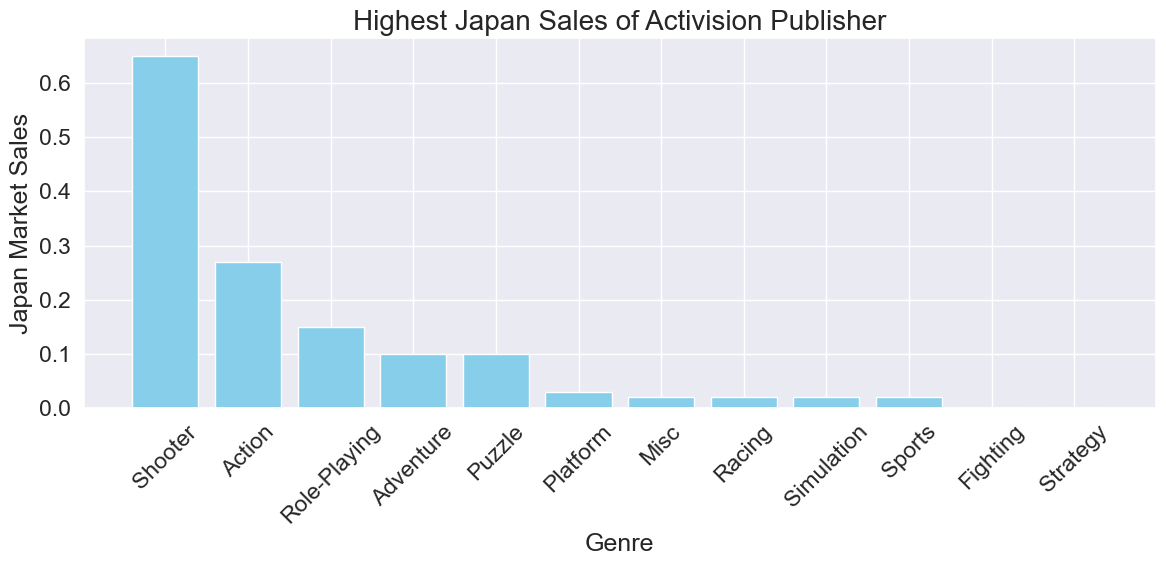

In [165]:
plt.figure(figsize=(12, 6))
## Plot
plt.bar(highest_jp_sales['Genre'], highest_jp_sales['JP_Sales'], color='skyblue')

## Labels
plt.xlabel('Genre')
plt.ylabel('Japan Market Sales')
## Title
plt.title('Highest Japan Sales of Activision Publisher', size = 20)

## Rotation of axis
plt.xticks(rotation=45)

plt.tight_layout()

## Display of plot
plt.show()

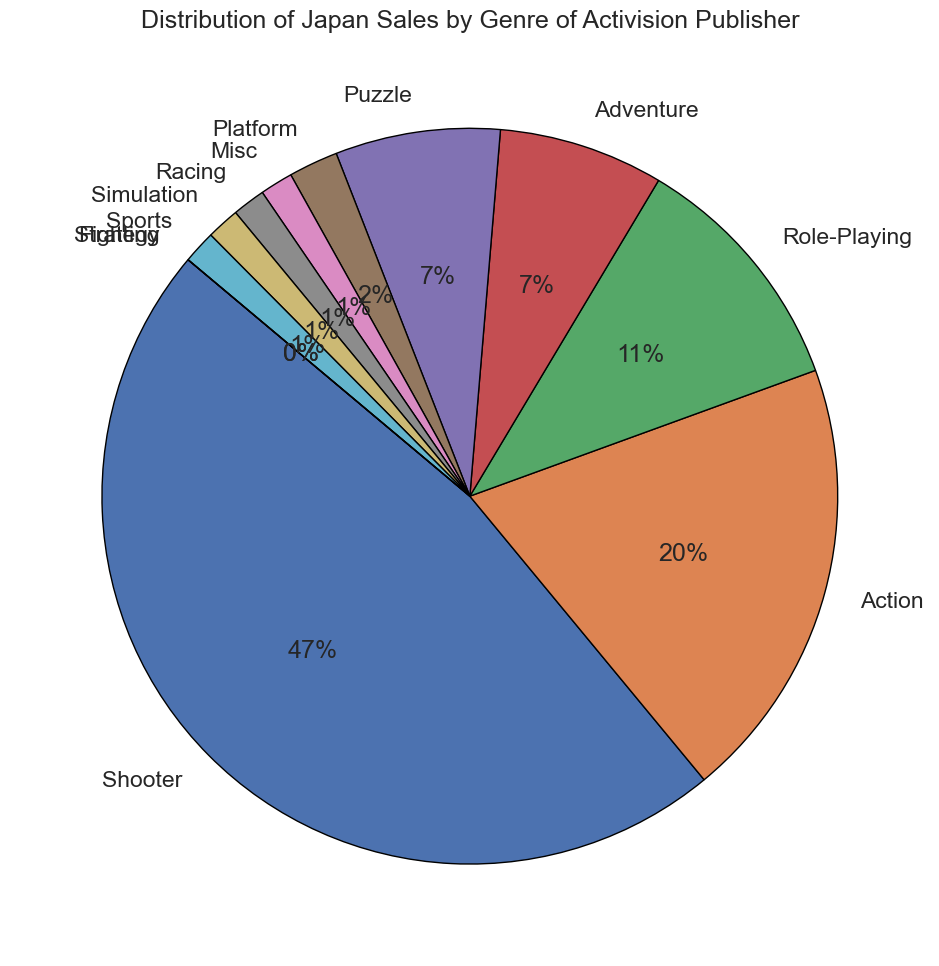

In [166]:
plt.figure(figsize=(10,10))
## Plot
plt.pie(highest_jp_sales['JP_Sales'], labels=highest_jp_sales['Genre'],wedgeprops={"edgecolor": "black"}, autopct='%1.0f%%', startangle=140)
##Title
plt.title('Distribution of Japan Sales by Genre of Activision Publisher')

plt.tight_layout()
##Display of plot
plt.show()

### 19. Top 10 Games by Global Sales

In [188]:
# Top 10 games by global sales
top_games = df.sort_values(by='Global_Sales', ascending=False).head(10)

# Print top 10 games
top_games[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']]

Name Platform    Year         Genre Publisher  \
0                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5                     Tetris       GB  1989.0        Puzzle  Nintendo   
6      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7                   Wii Play      Wii  2006.0          Misc  Nintendo   
8  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   Global_Sales  
0         82.74  
1         40.24  
2         35.82  
3         33.00  
4         31.37  
5         30.26  
6         30.01  
7         29.02  
8         28.62  
9         28.31

#### Nintendo is the most successful publisher in terms of global sales, as it has published all of the top 10 games in the table, with a total of 369.37 million units sold globally.
#### The most popular genres are Sports and Platform, with Wii Sports and Super Mario Bros. being the best-selling games in each genre. The most popular platforms are Wii and NES, with four games each in the top 10. 

### 20 . Most Popular Games Trend

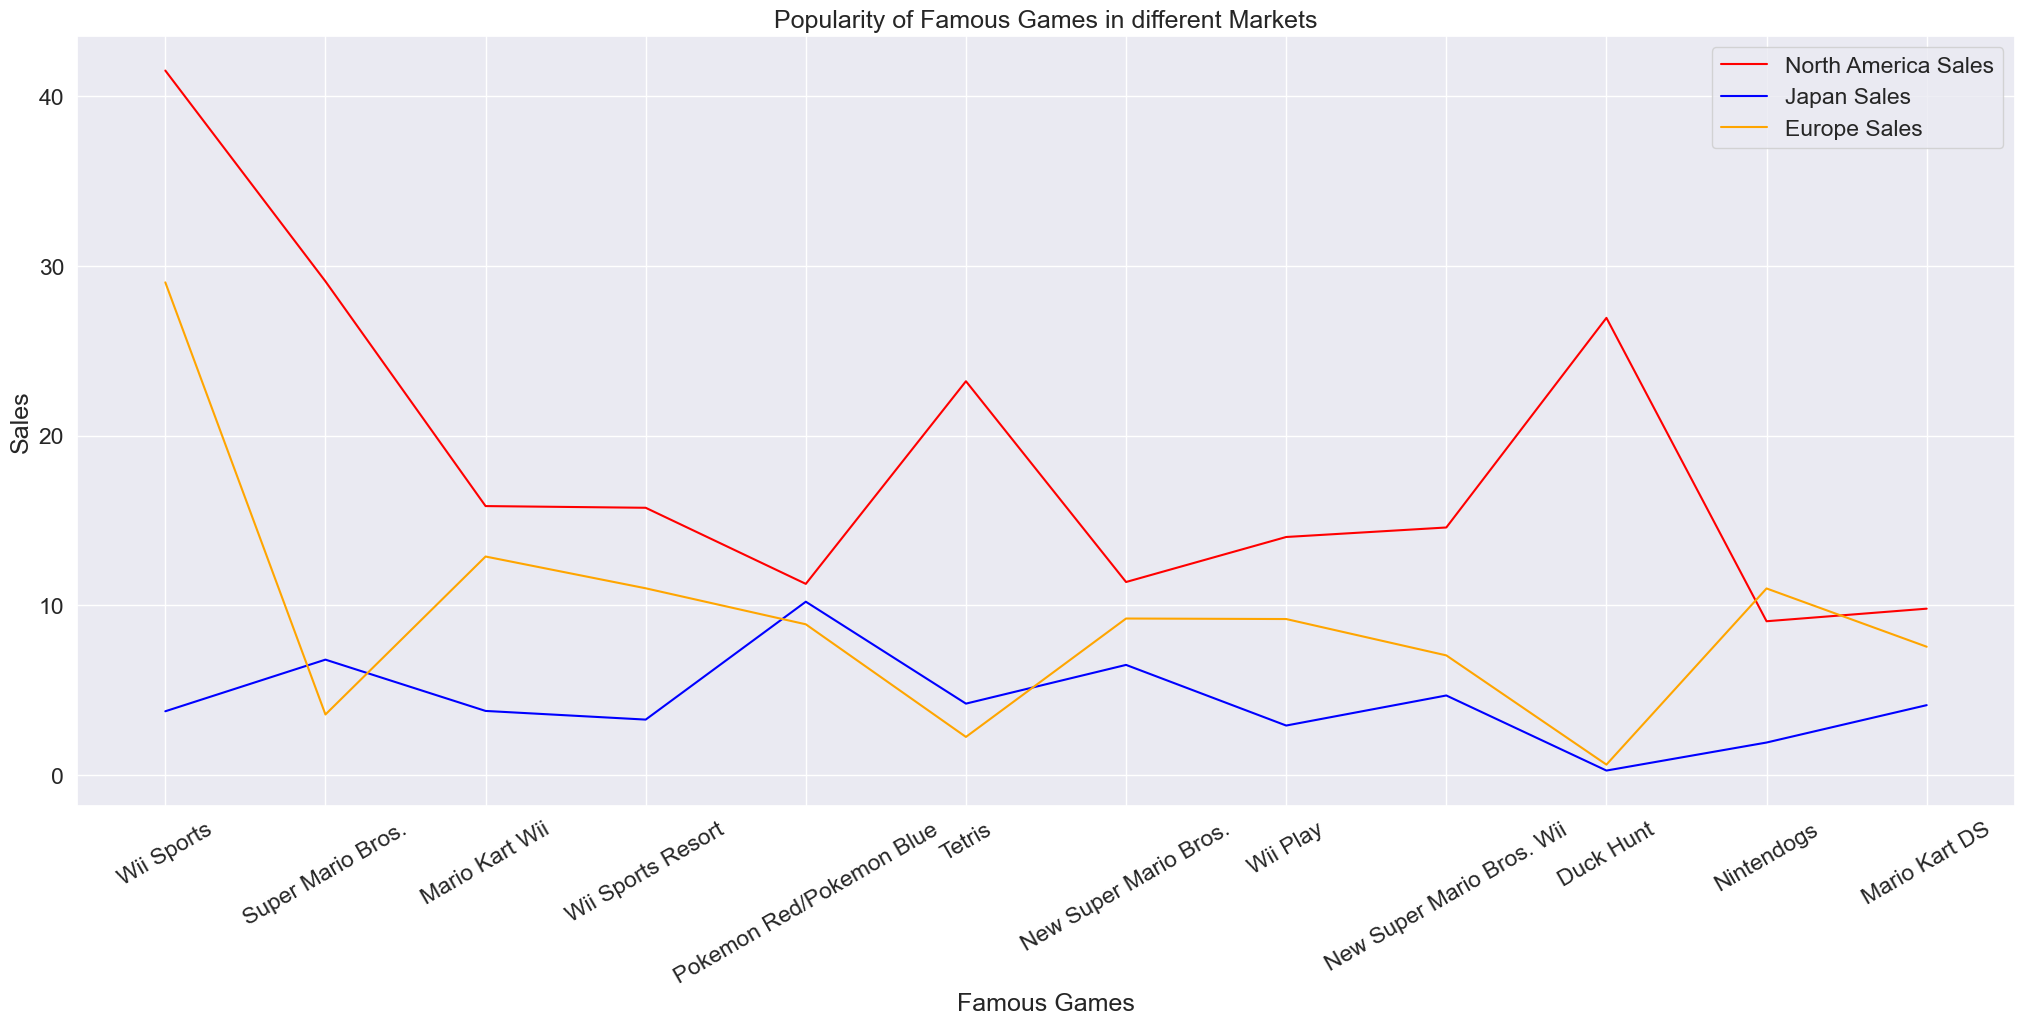

In [198]:
fig = plt.figure(figsize=(25,10))
plt.plot(df['Name'].head(12), df['NA_Sales'].head(12), color='red', label='North America Sales')
plt.plot(df['Name'].head(12), df['JP_Sales'].head(12), color ='blue', label='Japan Sales')
plt.plot(df['Name'].head(12), df['EU_Sales'].head(12), color='orange', label='Europe Sales')
plt.legend()
plt.xlabel('Famous Games')
plt.xticks(rotation=30)
plt.ylabel('Sales')
plt.title('Popularity of Famous Games in different Markets')
plt.show()

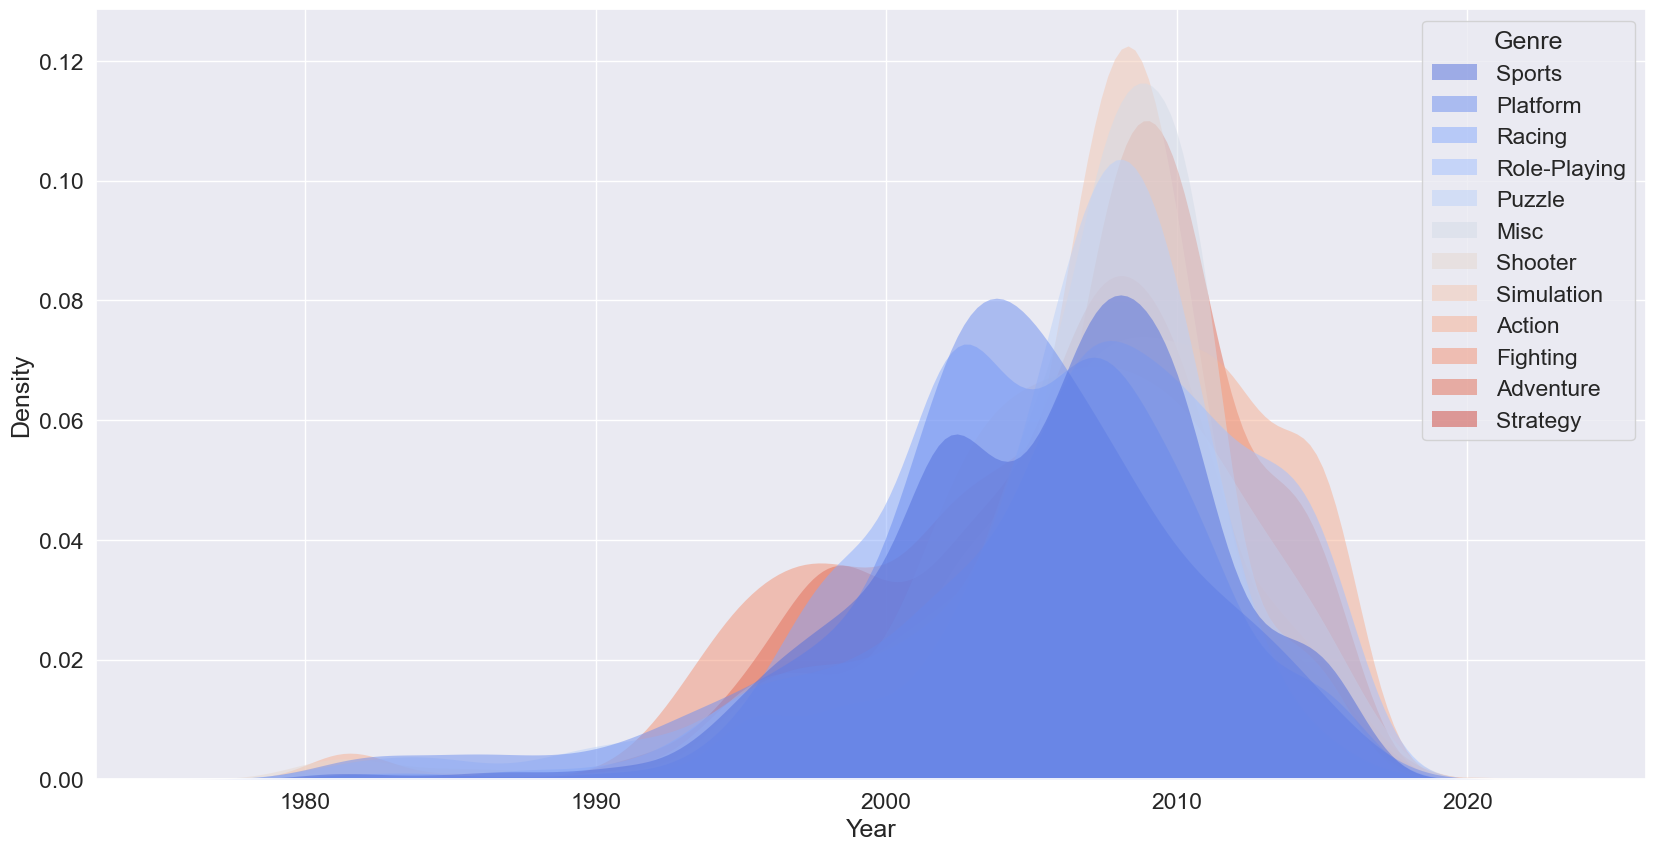

In [199]:
plt.figure(figsize=(20,10))
sns.kdeplot( data=df,  x='Year',hue="Genre", fill=True, common_norm=False,palette='coolwarm' , alpha=.5, linewidth=0,legend=True)
plt.show()

#### from the 1980s to 1990s, sports, racing, action, and shooter were very popular.
#### from 1990s to 2000s, all the genres kept increasing in addition to adventure and platform.
#### from 2000s to 2010s, all the genres kept increasing in addition to puzzle, action, simulation, fighting, misc were all at their peaks.
#### from 2010s to 2020,every genre is declining but action and role playing were the ones dominating while declining.